<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.1 Load the libraries:

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore') # To supress warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations

In [2]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.20.1
1.2.4
0.11.1


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.2. Import the dataset(Customer Churn Data.xlsx):

In [3]:
df = pd.read_excel("Customer Churn Data.xlsx", sheet_name="Data for DSBA")
df

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.00000,6.00000,Debit Card,Female,3.00000,3,Super,2.00000,Single,9,1.00000,11,1,5,159.93000,Mobile
1,20001,1,0,1.00000,8.00000,UPI,Male,3.00000,4,Regular Plus,3.00000,Single,7,1.00000,15,0,0,120.90000,Mobile
2,20002,1,0,1.00000,30.00000,Debit Card,Male,2.00000,4,Regular Plus,3.00000,Single,6,1.00000,14,0,3,NaN,Mobile
3,20003,1,0,3.00000,15.00000,Debit Card,Male,2.00000,4,Super,5.00000,Single,8,0.00000,23,0,3,134.07000,Mobile
4,20004,1,0,1.00000,12.00000,Credit Card,Male,2.00000,3,Regular Plus,5.00000,Single,3,0.00000,11,1,3,129.60000,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,31255,0,10,1.00000,34.00000,Credit Card,Male,3.00000,2,Super,1.00000,Married,9,0.00000,19,1,4,153.71000,Computer
11256,31256,0,13,1.00000,19.00000,Credit Card,Male,3.00000,5,HNI,5.00000,Married,7,0.00000,16,1,8,226.91000,Mobile
11257,31257,0,1,1.00000,14.00000,Debit Card,Male,3.00000,2,Super,4.00000,Married,7,1.00000,22,1,4,191.42000,Mobile
11258,31258,0,23,3.00000,11.00000,Credit Card,Male,4.00000,5,Super,4.00000,Married,7,0.00000,16,2,9,179.90000,Computer


### Initial Observation from the given data - 

- Account ID is an unique customer identifier. Each account ID has a primary account holder, and x number of users tagged to them.
- As a part of this data account user count depicts the number of users tagged to the primary account
- Churn column depicts the number of customers who have cancelled their subscription with DTHExpress
- Revenue per month has no unit associate, hence we will assume it to be INR '000


In [4]:
# Checking the top 5 rows of the data

df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.00000,6.00000,Debit Card,Female,3.00000,3,Super,2.00000,Single,9,1.00000,11,1,5,159.93000,Mobile
1,20001,1,0,1.00000,8.00000,UPI,Male,3.00000,4,Regular Plus,3.00000,Single,7,1.00000,15,0,0,120.90000,Mobile
2,20002,1,0,1.00000,30.00000,Debit Card,Male,2.00000,4,Regular Plus,3.00000,Single,6,1.00000,14,0,3,NaN,Mobile
3,20003,1,0,3.00000,15.00000,Debit Card,Male,2.00000,4,Super,5.00000,Single,8,0.00000,23,0,3,134.07000,Mobile
4,20004,1,0,1.00000,12.00000,Credit Card,Male,2.00000,3,Regular Plus,5.00000,Single,3,0.00000,11,1,3,129.60000,Mobile


In [5]:
# Checking the last 5 rows of the data

df.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.00000,34.00000,Credit Card,Male,3.00000,2,Super,1.00000,Married,9,0.00000,19,1,4,153.71000,Computer
11256,31256,0,13,1.00000,19.00000,Credit Card,Male,3.00000,5,HNI,5.00000,Married,7,0.00000,16,1,8,226.91000,Mobile
11257,31257,0,1,1.00000,14.00000,Debit Card,Male,3.00000,2,Super,4.00000,Married,7,1.00000,22,1,4,191.42000,Mobile
11258,31258,0,23,3.00000,11.00000,Credit Card,Male,4.00000,5,Super,4.00000,Married,7,0.00000,16,2,9,179.90000,Computer
11259,31259,0,8,1.00000,22.00000,Credit Card,Male,3.00000,2,Super,3.00000,Married,5,0.00000,13,2,3,175.04000,Mobile


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.3 Check the Dimension of data?

In [6]:
# Check data shape

df.shape
print("\n Number of rows in the data: ", df.shape[0], "\n Number of columns in the data: ", df.shape[1])


 Number of rows in the data:  11260 
 Number of columns in the data:  19


**The data has 19 columns or variables/features/attributes and 11260 observations or records.**

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.4 Check the Information about the data and the datatypes of each respective attributes.

In [7]:
# Check Data Info
 
df.info()  #To check the data type of each variable, number of values entered in each of the variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

This dataset is created for prediction of a DTH company's Churn rate. Below are the details for categorical data - 

    1. Churn ( 1: Yes & 0: No ) 
    2. City_Tier ( 1: Urban/Developed/Metro; 2: Developing/Town; 3: Underdeveloped/Village/Rural) 
    3. Payment ( UPI, Debit Card, Credit Card, E-wallet, Cash On Delivery)
    4. Gender ( M: Male; F: Female )  
    5. account_segment( Regular, Regular Plus, Super, Super Plus, HNI ) 
    6. Marital Status ( Married, Divorced, Single ) 
    7. Login_device ( Mobile , Computer) 
    8. Chance of Admit ( ranging from  0.34 to 0.97)

In [8]:
# Checking the data types of all the columns
df.dtypes

AccountID                    int64
Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

**Quick Observations**

From the given data dictionary it is evident that a few variables incorrectly represented as  numeric/categrocial
- Tenure represents the duration of the customer with DTHExpress and should be an integer value 
- City_Tier represents the tier type and is categorical data 
- CC_Contacted_LY represents the number of of times the customer contacted the company customer care over the last 12 months and should be integer
- Account_user_count is the number of users tagged to a primary account, and therefore should be numeric and not object data type
- rev_per_month is the revenue generated by each account during last 12 months and is in '000. Therefore should be numeric
- rev_growth_yoy is the revenue registered by each account during last 12 months and is in %. Therefore should be numeric
- coupon_used_for_payment depicts the number of coupon a customer account used during last 12 months. Therefore, should be numeric
-  Day_Since_CC_connect -represents the number days since the customer last connected with customer care and hence should be numeric
- cashback represents the average monthly cashback amount generated by the customer account in last 12 months and hence should be numeric


In [9]:
100*df['Churn'].value_counts()/len(df['Churn'])

0   83.16163
1   16.83837
Name: Churn, dtype: float64

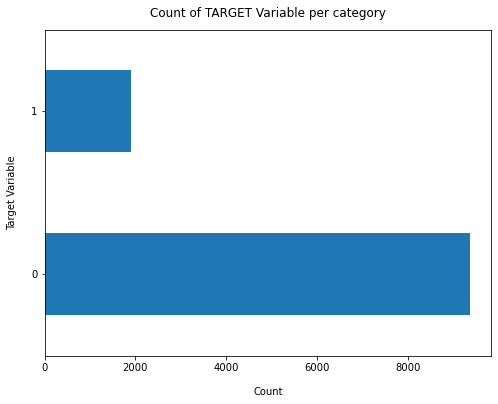

In [10]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

**Quick Observations**

- Data is imbalanced, ratio = 83:16; So we analyse the data with other features while taking the target values separately to get some insights

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.5 Check of duplicates & Missing Values

### CHECKING DUPLICATES

In [11]:
##Identify duplicates records in the data

dups = df.duplicated()
sum(dups)
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [12]:
# What isnull() function recognises as missing value

pd.DataFrame({'value' : df['Churn'], 'Missing?' : df['Churn'].isnull()}) 

,value,Missing?
0,1,False
1,1,False
2,1,False
3,1,False
4,1,False
...,...,...
11255,0,False
11256,0,False
11257,0,False
11258,0,False


### CHECKING MISSING VALUES

In [13]:
df.isnull().sum()


AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [14]:
# % of rows missing in each column
for column in df.columns:
    percentage = df[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')

AccountID: 0.0%
Churn: 0.0%
Tenure: 0.91%
City_Tier: 0.99%
CC_Contacted_LY: 0.91%
Payment: 0.97%
Gender: 0.96%
Service_Score: 0.87%
Account_user_count: 0.99%
account_segment: 0.86%
CC_Agent_Score: 1.03%
Marital_Status: 1.88%
rev_per_month: 0.91%
Complain_ly: 3.17%
rev_growth_yoy: 0.0%
coupon_used_for_payment: 0.0%
Day_Since_CC_connect: 3.17%
cashback: 4.18%
Login_device: 1.96%


### CHECKING MISSING VALUES

In [15]:
#1 Churn

df['Churn'].unique()


array([1, 0], dtype=int64)

In [16]:
#2 Tenure

df['Tenure'].unique() # Tenure has some bad data "#" and missing values; The data type should be object

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [17]:
#3 City_Tier

df['City_Tier'].unique()  #City_Tier has missing values

array([ 3.,  1., nan,  2.])

In [18]:
#4 CC_Contacted_LY

df['CC_Contacted_LY'].unique()  #CC_Contacted_LY has missing values

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

In [19]:
#5 Payment

df['Payment'].unique()  #Payment has missing values

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [20]:
#6 Gender

df['Gender'].unique()  

#Gender has missing values and bad data in terms of the terminology used. Female customers as are categorized as F & Female, we can have only one category, same for male customers

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [21]:
#7 Service_Score

df['Service_Score'].unique()  #Service_Score has missing values

array([ 3.,  2.,  1., nan,  0.,  4.,  5.])

In [22]:
#8 Account_user_count

df['Account_user_count'].unique()  #Account_user_count has missing values abd bad data "@". The datatype should be integer

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [23]:
#9 account_segment

df['account_segment'].unique()  #account_segment has missing values; Regular + and Regular Plus can be clubbed, similarly Super & Super + can be clubbed.

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

In [24]:
#10 CC_Agent_Score

df['CC_Agent_Score'].unique()  #CC_Agent_Score has missing values

array([ 2.,  3.,  5.,  4., nan,  1.])

In [25]:
#11 Marital_Status

df['Marital_Status'].unique()  #Marital_Status has missing values

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [26]:
#12 rev_per_month

df['rev_per_month'].unique()  #rev_per_month has missing values and bad data "+". The datatype should be integer

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [27]:
#13 Complain_ly

df['Complain_ly'].unique()  #Complain_ly has missing values

array([ 1.,  0., nan])

In [28]:
#14 rev_growth_yoy

df['rev_growth_yoy'].unique()  #rev_growth_yoy has bad data "$". The datatype should be integer

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [29]:
#15 coupon_used_for_payment
df['coupon_used_for_payment'].unique()  #coupon_used_for_payment has bad data "$" "#" and "*". The data type should be integer

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [30]:
#16 Day_Since_CC_connect
df['Day_Since_CC_connect'].unique()  #Day_Since_CC_connect has bad data "$" and missing values. The data type should be integer

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [31]:
#17 cashback
df['cashback'].unique()  #cashback has missing values. The datatype should be integer

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [32]:
#18 Login_device
df['Login_device'].unique()  #Login_device has missing values and bad data "&&&&"

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

#### Observations -
- Variables including tenure, account_user_count, rev_per_month, rev_growth_yoy, coupon_used_l12m and Day_Since_CC_connect has bad data, which needs to be treated
- Account_user_count, rev_per_month, rev_growth_yoy, coupon_used_l12m Day_Since_CC_connect and cashback_l12m are identified as object datatype. Hence, we cannot retrieve the mean or median value of these fields to replace the bad data. 
- Hence, first replace #, @, +, $, &&&&, and * with Null

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.6 Data Cleaning

### Treat Bad Data 

### Replace #, @, +, $, &&&&, and * with Null from these variables tenure, account_user_count, rev_per_month, rev_growth_yoy, coupon_used_l12m, Day_Since_CC_connect ang login device

In [33]:
df['Tenure'] = df['Tenure'].replace('#',np.NaN)
df['Account_user_count'] = df['Account_user_count'].replace('@',np.NaN)
df['rev_per_month'] = df['rev_per_month'].replace('+',np.NaN)
df['rev_growth_yoy'] = df['rev_growth_yoy'].replace('$',np.NaN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('$',np.NaN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('*',np.NaN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('#',np.NaN)
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace('$',np.NaN)
df['Login_device'] = df['Login_device'].replace('&&&&',np.NaN)
df['cashback'] = df['cashback'].replace('$',np.NaN)

In [34]:
df.Tenure = pd.to_numeric(df.Tenure)
df.CC_Contacted_LY = pd.to_numeric(df.CC_Contacted_LY)
df.Service_Score = pd.to_numeric(df.Service_Score)
df.Account_user_count = pd.to_numeric(df.Account_user_count)
df.CC_Agent_Score = pd.to_numeric(df.CC_Agent_Score)
df.coupon_used_for_payment = pd.to_numeric(df.coupon_used_for_payment)
df.coupon_used_for_payment = pd.to_numeric(df.coupon_used_for_payment)
df.cashback = pd.to_numeric(df.cashback)

In [35]:
df['Churn'] = df['Churn'].astype('object')
df['City_Tier'] = df['City_Tier'].astype('object')
df['Complain_ly'] = df['Complain_ly'].astype('object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  object 
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  object 
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  object 
 14  rev_growth_yoy        

### Treat Anomalies

#### Combining Female & F records under one tag "F". and Male & M records under one tag "M"

In [37]:
df.Gender.value_counts()

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

In [38]:
df[df['Gender'] == "Female"]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.00000,3.00000,6.00000,Debit Card,Female,3.00000,3.00000,Super,2.00000,Single,9.00000,1.00000,11.00000,1.00000,5.00000,159.93000,Mobile
5,20005,1,0.00000,1.00000,22.00000,Debit Card,Female,3.00000,NaN,Regular Plus,5.00000,Single,2.00000,1.00000,22.00000,4.00000,7.00000,139.19000,Computer
16,20016,1,0.00000,1.00000,12.00000,Debit Card,Female,3.00000,4.00000,Regular Plus,2.00000,Single,2.00000,1.00000,18.00000,1.00000,0.00000,129.26000,Computer
19,20019,1,19.00000,1.00000,20.00000,Debit Card,Female,3.00000,3.00000,Regular +,4.00000,Divorced,NaN,NaN,18.00000,1.00000,3.00000,149.63000,Mobile
21,20021,1,20.00000,1.00000,29.00000,Credit Card,Female,3.00000,3.00000,HNI,2.00000,Divorced,2.00000,0.00000,12.00000,11.00000,6.00000,203.12000,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11247,31247,0,14.00000,1.00000,12.00000,Credit Card,Female,4.00000,4.00000,Regular +,3.00000,Married,NaN,NaN,15.00000,1.00000,3.00000,145.01000,Mobile
11248,31248,0,9.00000,1.00000,13.00000,Debit Card,Female,4.00000,6.00000,Regular Plus,1.00000,Married,6.00000,0.00000,15.00000,2.00000,2.00000,157.77000,Mobile
11250,31250,0,3.00000,1.00000,40.00000,Credit Card,Female,4.00000,5.00000,Regular Plus,5.00000,Single,5.00000,0.00000,17.00000,1.00000,5.00000,164.85000,Mobile
11252,31252,0,13.00000,3.00000,33.00000,E wallet,Female,3.00000,NaN,Super Plus,1.00000,Married,4.00000,0.00000,12.00000,4.00000,7.00000,252.31000,Mobile


In [39]:
df_f = df[df['Gender'] == 'F']['Gender'].values[0]
df_f

'F'

In [40]:
df['Gender'] = df['Gender'].replace(to_replace='Female',value=df_f)
df[df['Gender'] == "Male"]
df_m = df[df['Gender'] == 'M']['Gender'].values[0]
df_m
df['Gender'] = df['Gender'].replace(to_replace='Male',value=df_m)
df.Gender.value_counts()

M    6704
F    4448
Name: Gender, dtype: int64

### Combining Regular Plus & Regular + records under one tag "Regular Plus". and Super Plus & Super + records under one tag "Super Plus"

In [41]:
df.account_segment.value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [42]:
df[df['account_segment'] == "Regular +"]
df[df['account_segment'] == "Super + +"]
df_sp = df[df['account_segment'] == 'Super Plus']['account_segment'].values[0]
df_rp = df[df['account_segment'] == 'Regular Plus']['account_segment'].values[0]
df['account_segment'] = df['account_segment'].replace(to_replace='Regular +',value=df_rp)
df['account_segment'] = df['account_segment'].replace(to_replace='Super +',value=df_sp)
df.account_segment.value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

### Treat Missing Values

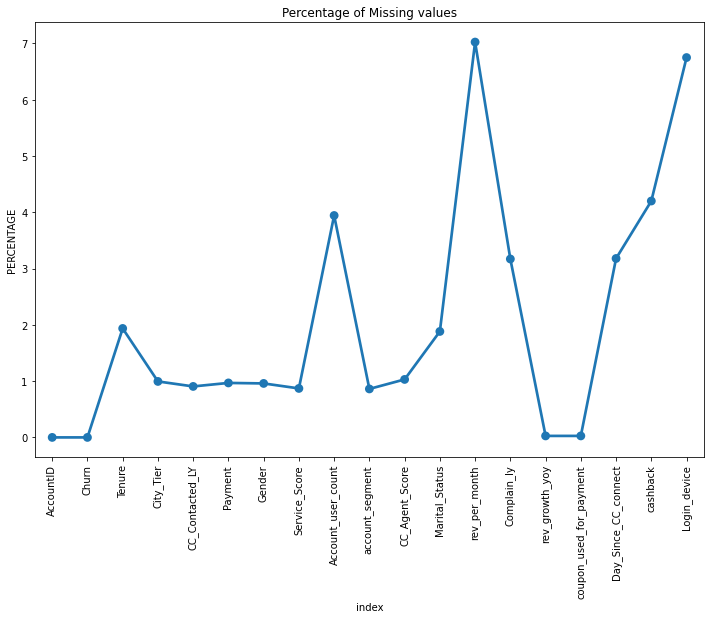

In [43]:
totalmissing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(12,8))
ax = sns.pointplot('index',0,data=totalmissing)
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [44]:
# % of rows missing in each column
for column in df.columns:
    percentage = df[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')

AccountID: 0.0%
Churn: 0.0%
Tenure: 1.94%
City_Tier: 0.99%
CC_Contacted_LY: 0.91%
Payment: 0.97%
Gender: 0.96%
Service_Score: 0.87%
Account_user_count: 3.94%
account_segment: 0.86%
CC_Agent_Score: 1.03%
Marital_Status: 1.88%
rev_per_month: 7.02%
Complain_ly: 3.17%
rev_growth_yoy: 0.03%
coupon_used_for_payment: 0.03%
Day_Since_CC_connect: 3.18%
cashback: 4.2%
Login_device: 6.75%


In [45]:
missing_catvar = [var for var in df.columns if df[var].isnull().mean()>0 and df[var].dtypes == 'O']
missing_catvar #listing categorical variables with missing data

['City_Tier',
 'Payment',
 'Gender',
 'account_segment',
 'Marital_Status',
 'Complain_ly',
 'Login_device']

In [46]:
from statistics import mode

In [47]:
### Handling missing data for Categorical variables

In [48]:
df['City_Tier']=df['City_Tier'].fillna(value=mode(df['City_Tier']))
df['Payment']=df['Payment'].fillna(value=mode(df['Payment']))
df['Gender']=df['Gender'].fillna(value=mode(df['Gender']))
df['Marital_Status']=df['Marital_Status'].fillna(value=mode(df['Marital_Status']))
df['Complain_ly']=df['Complain_ly'].fillna(value=mode(df['Complain_ly']))
df['Login_device']=df['Login_device'].fillna(value=mode(df['Login_device']))
df['account_segment']=df['account_segment'].fillna(value=mode(df['account_segment']))


In [49]:
missing_catvar1 = [var for var in df.columns if df[var].isnull().mean()>0 and df[var].dtypes == 'O']
missing_catvar1 #listing categorical variables with missing data

[]

### Handling missing data for Numerical variables

In [50]:
from sklearn.impute import KNNImputer

In [51]:
knn_imp = KNNImputer(n_neighbors=5)

In [52]:
df[['Tenure','CC_Contacted_LY','Service_Score','Account_user_count','CC_Agent_Score','rev_per_month','rev_growth_yoy','rev_growth_yoy','cashback','coupon_used_for_payment','Day_Since_CC_connect']]=knn_imp.fit_transform(df[['Tenure','CC_Contacted_LY','Service_Score','Account_user_count','CC_Agent_Score','rev_per_month','rev_growth_yoy','rev_growth_yoy','cashback','coupon_used_for_payment','Day_Since_CC_connect']])
df[['Tenure','CC_Contacted_LY','Service_Score','Account_user_count','CC_Agent_Score','rev_per_month','rev_growth_yoy','rev_growth_yoy','cashback','coupon_used_for_payment','Day_Since_CC_connect']].isnull().sum()

Tenure                     0
CC_Contacted_LY            0
Service_Score              0
Account_user_count         0
CC_Agent_Score             0
rev_per_month              0
rev_growth_yoy             0
rev_growth_yoy             0
cashback                   0
coupon_used_for_payment    0
Day_Since_CC_connect       0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  object 
 2   Tenure                   11260 non-null  float64
 3   City_Tier                11260 non-null  float64
 4   CC_Contacted_LY          11260 non-null  float64
 5   Payment                  11260 non-null  object 
 6   Gender                   11260 non-null  object 
 7   Service_Score            11260 non-null  float64
 8   Account_user_count       11260 non-null  float64
 9   account_segment          11260 non-null  object 
 10  CC_Agent_Score           11260 non-null  float64
 11  Marital_Status           11260 non-null  object 
 12  rev_per_month            11260 non-null  float64
 13  Complain_ly              11260 non-null  float64
 14  rev_growth_yoy        

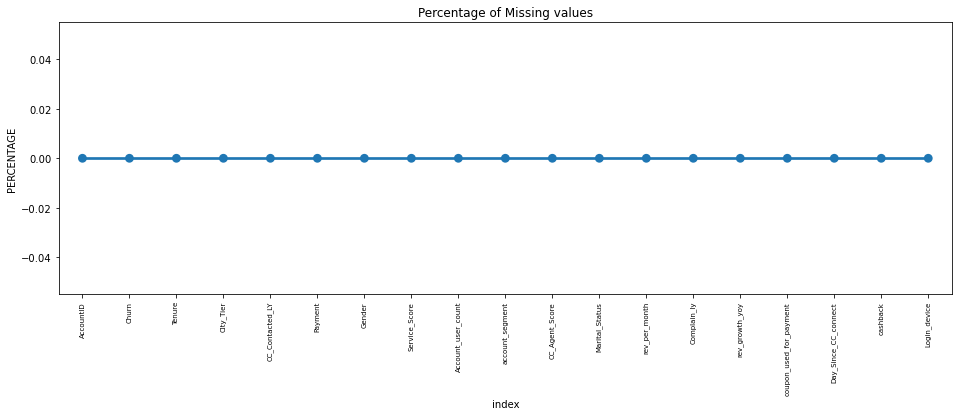

In [54]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.7 Check Data for Outliers

## Outlier Check

In [55]:
df_copy = df.copy()
df_copy.drop('AccountID', axis = 1, inplace=True)

In [56]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,11260.00000,10.99044,12.77695,0.00000,2.00000,9.00000,16.00000,99.00000
City_Tier,11260.00000,1.64742,0.91276,1.00000,1.00000,1.00000,3.00000,3.00000
CC_Contacted_LY,11260.00000,17.85782,8.82377,4.00000,11.00000,16.00000,23.00000,132.00000
Service_Score,11260.00000,2.90325,0.72358,0.00000,2.00000,3.00000,3.00000,5.00000
Account_user_count,11260.00000,3.69108,1.00867,1.00000,3.00000,4.00000,4.00000,6.00000
CC_Agent_Score,11260.00000,3.06568,1.37456,1.00000,2.00000,3.00000,4.00000,5.00000
rev_per_month,11260.00000,6.33957,11.55477,1.00000,3.00000,5.00000,7.00000,140.00000
Complain_ly,11260.00000,0.27629,0.44718,0.00000,0.00000,0.00000,1.00000,1.00000
rev_growth_yoy,11260.00000,16.19302,3.75733,4.00000,13.00000,15.00000,19.00000,28.00000
coupon_used_for_payment,11260.00000,1.79089,1.96960,0.00000,1.00000,1.00000,2.00000,16.00000


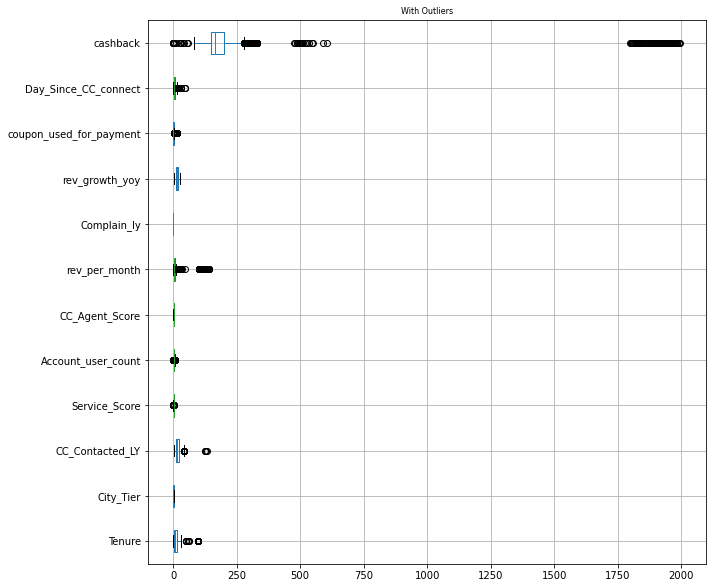

In [57]:
plt.figure(figsize=(10,10))
df_copy.boxplot(vert=0)
plt.title('With Outliers',fontsize=8)
plt.show()

In [58]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [59]:
lrrpm,urrpm=remove_outlier(df['rev_per_month'])
df['rev_per_month']=np.where(df['rev_per_month']>urrpm,urrpm,df['rev_per_month'])
df['rev_per_month']=np.where(df['rev_per_month']<lrrpm,lrrpm,df['rev_per_month'])

lrtenure,urtenure=remove_outlier(df['Tenure'])
df['Tenure']=np.where(df['Tenure']>urtenure,urtenure,df['Tenure'])
df['Tenure']=np.where(df['Tenure']<lrtenure,lrtenure,df['Tenure'])



lrcb,urcb=remove_outlier(df['cashback'])
df['cashback']=np.where(df['cashback']>urcb,urcb,df['cashback'])
df['cashback']=np.where(df['cashback']<lrcb,lrcb,df['cashback'])


lrccly,urccly=remove_outlier(df['CC_Contacted_LY'])
df['CC_Contacted_LY']=np.where(df['CC_Contacted_LY']>urccly,urccly,df['CC_Contacted_LY'])
df['CC_Contacted_LY']=np.where(df['CC_Contacted_LY']<lrccly,lrccly,df['CC_Contacted_LY'])
   
   
lrcoupon,urcoupon=remove_outlier(df['coupon_used_for_payment'])
df['coupon_used_for_payment']=np.where(df['coupon_used_for_payment']>urcoupon,urcoupon,df['coupon_used_for_payment'])
df['coupon_used_for_payment']=np.where(df['coupon_used_for_payment']<lrcoupon,lrcoupon,df['coupon_used_for_payment'])
   
   
lrlconn,urlcon=remove_outlier(df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=np.where(df['Day_Since_CC_connect']>urlcon,urlcon,df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=np.where(df['Day_Since_CC_connect']<lrlconn,lrlconn,df['Day_Since_CC_connect'])

lrlauc,urlauc=remove_outlier(df['Account_user_count'])
df['Account_user_count']=np.where(df['Account_user_count']>urlauc,urlauc,df['Account_user_count'])
df['Account_user_count']=np.where(df['Account_user_count']<lrlauc,lrlauc,df['Account_user_count'])
   
lrlSC,urlSC=remove_outlier(df['Service_Score'])
df['Service_Score']=np.where(df['Service_Score']>urlSC,urlSC,df['Service_Score'])
df['Service_Score']=np.where(df['Service_Score']<lrlSC,lrlSC,df['Service_Score'])
   

In [60]:
df.shape

(11260, 19)

<AxesSubplot:title={'center':'Without Outliers'}>

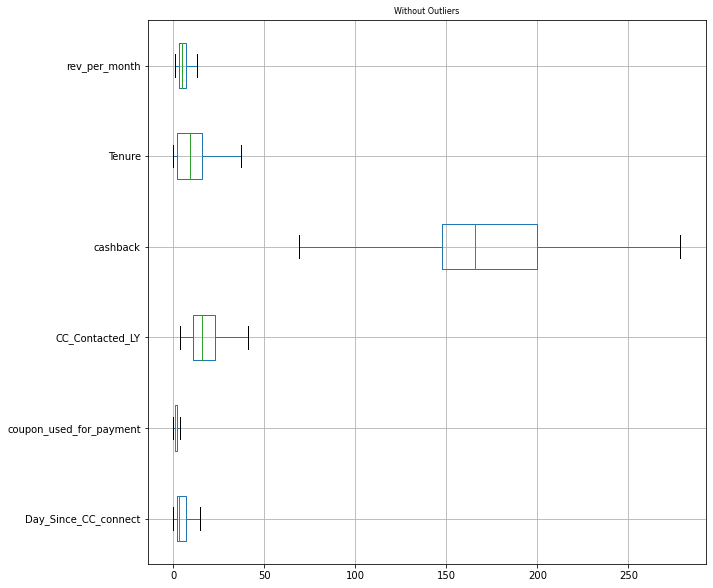

In [61]:
plt.figure(figsize=(10,10))
plt.title('Without Outliers',fontsize=8)
df[['Day_Since_CC_connect','coupon_used_for_payment','CC_Contacted_LY','cashback','Tenure','rev_per_month']].boxplot(figsize=(10,5), vert = 0)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.7 Exploratory Analysis of the Given Data

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:##008fb7;">1.7.1 Univaritate Analysis

In [62]:
df.dtypes

AccountID                    int64
Churn                       object
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

### Numeric Data Analysis

<AxesSubplot:xlabel='Tenure'>

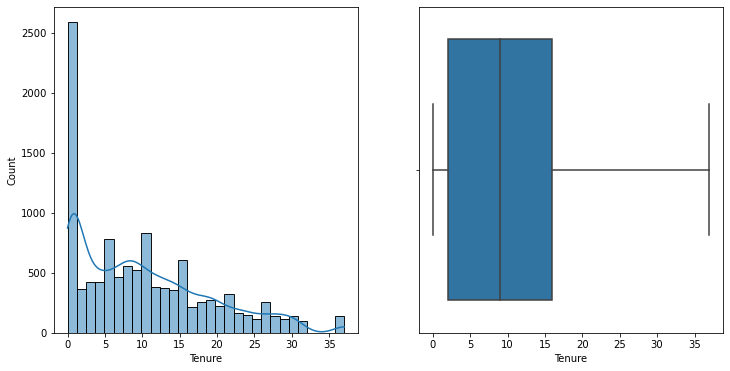

In [63]:
#Tenure

fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(12,6)) #Tenure
sns.histplot(df['Tenure'], kde=True, ax=axs[0])
sns.boxplot(x='Tenure',data=df, ax=axs[1])

<AxesSubplot:xlabel='CC_Contacted_LY'>

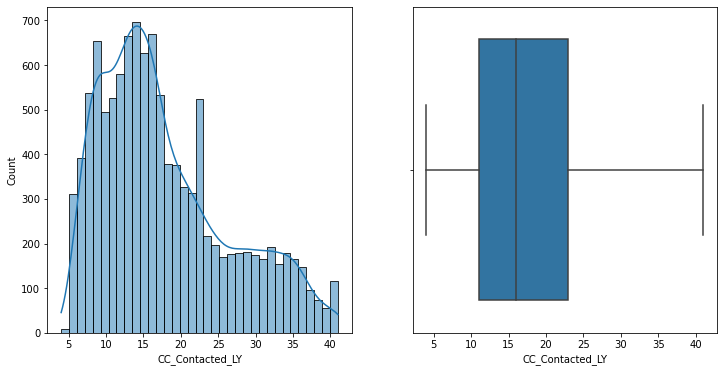

In [64]:
# CC_Contacted_LY

fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(12,6)) #Tenure
sns.histplot(df['CC_Contacted_LY'], kde=True, ax=axs[0])
sns.boxplot(x='CC_Contacted_LY',data=df, ax=axs[1])

<AxesSubplot:xlabel='Service_Score'>

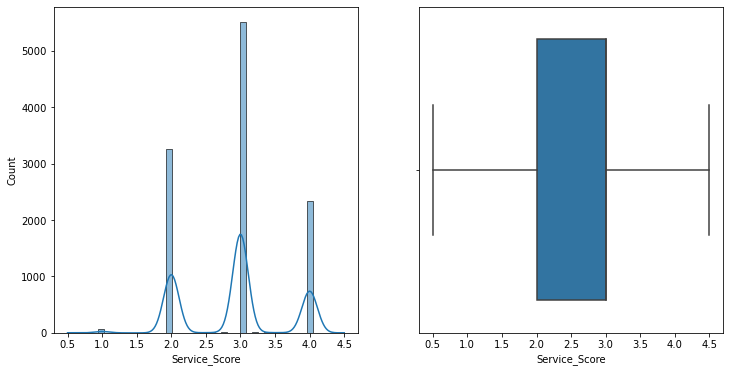

In [65]:
#Service_Score

fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(12,6)) #Tenure
sns.histplot(df['Service_Score'], kde=True, ax=axs[0])
sns.boxplot(x='Service_Score',data=df, ax=axs[1])

<AxesSubplot:xlabel='Account_user_count'>

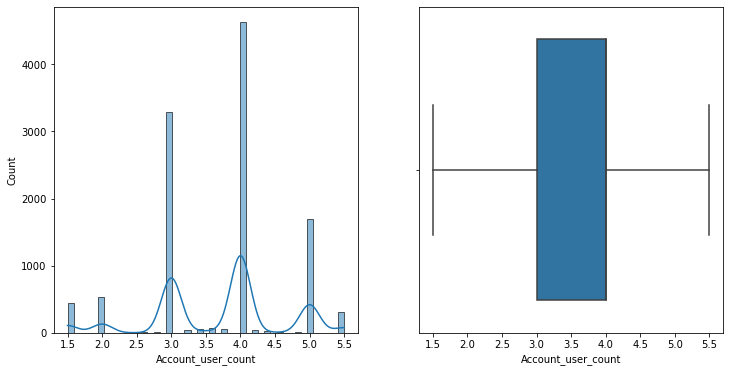

In [66]:
#Account_user_count

fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(12,6)) #Tenure
sns.histplot(df['Account_user_count'], kde=True, ax=axs[0])
sns.boxplot(x='Account_user_count',data=df, ax=axs[1])

<AxesSubplot:xlabel='CC_Agent_Score'>

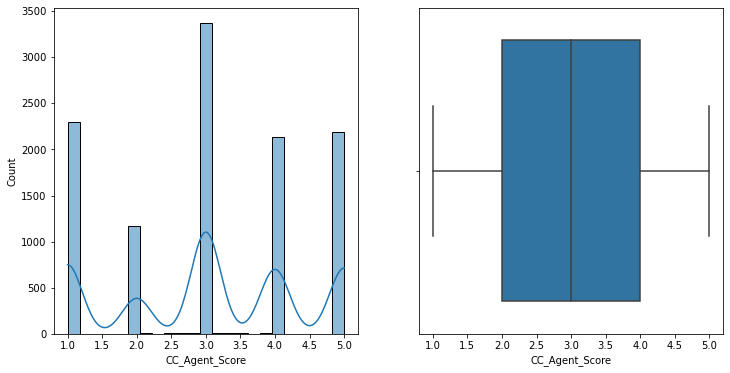

In [67]:
#CC_Agent_Score

fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(12,6)) #Tenure
sns.histplot(df['CC_Agent_Score'], kde=True, ax=axs[0])
sns.boxplot(x='CC_Agent_Score',data=df, ax=axs[1])

<AxesSubplot:xlabel='rev_per_month'>

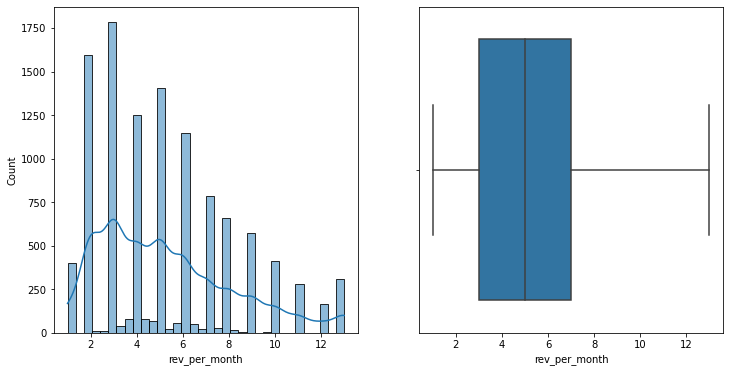

In [68]:
#rev_per_month

fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(12,6)) #Tenure
sns.histplot(df['rev_per_month'], kde=True, ax=axs[0])
sns.boxplot(x='rev_per_month',data=df, ax=axs[1])

<AxesSubplot:xlabel='rev_growth_yoy'>

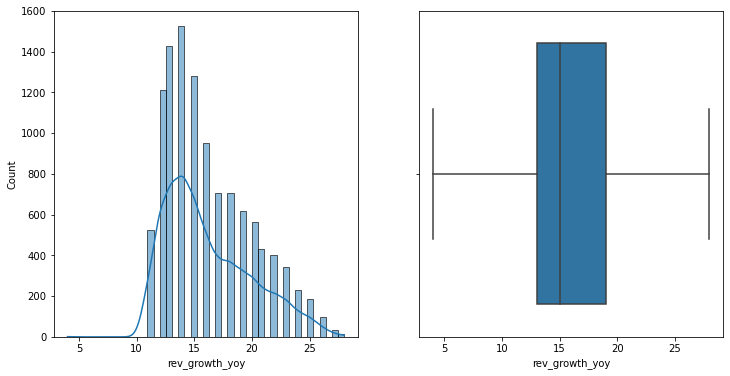

In [69]:
#rev_growth_yoy

fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(12,6)) #Tenure
sns.histplot(df['rev_growth_yoy'], kde=True, ax=axs[0])
sns.boxplot(x='rev_growth_yoy',data=df, ax=axs[1])

<AxesSubplot:xlabel='coupon_used_for_payment'>

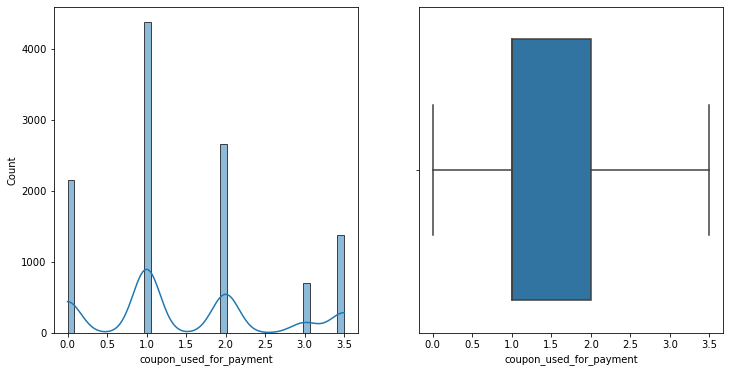

In [70]:
#coupon_used_for_payment

fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(12,6)) #Tenure
sns.histplot(df['coupon_used_for_payment'], kde=True, ax=axs[0])
sns.boxplot(x='coupon_used_for_payment',data=df, ax=axs[1])

<AxesSubplot:xlabel='Day_Since_CC_connect'>

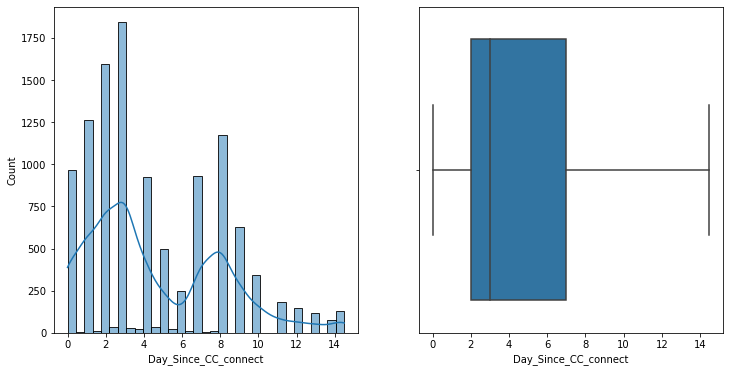

In [71]:
#Day_Since_CC_connect

fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(12,6)) #Tenure
sns.histplot(df['Day_Since_CC_connect'], kde=True, ax=axs[0])
sns.boxplot(x='Day_Since_CC_connect',data=df, ax=axs[1])

<AxesSubplot:xlabel='cashback'>

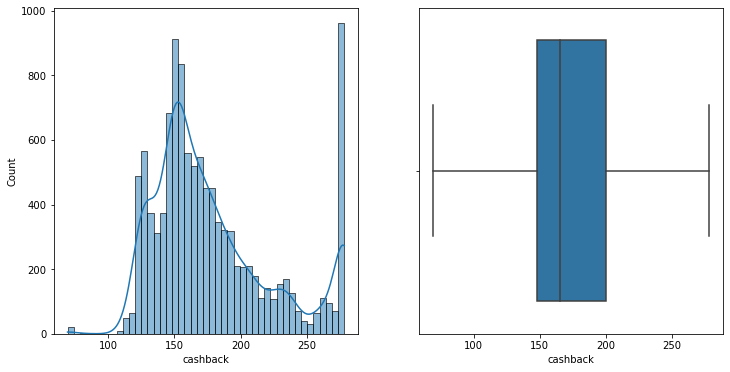

In [72]:
#cashback

fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(12,6)) #Tenure
sns.histplot(df['cashback'], kde=True, ax=axs[0])
sns.boxplot(x='cashback',data=df, ax=axs[1])

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:##008fb7;">1.7.2 Bivaritate Analysis

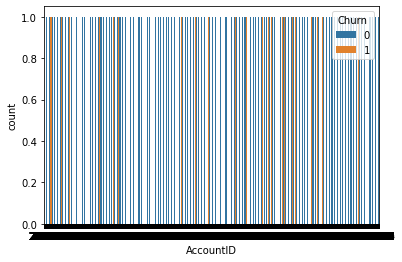

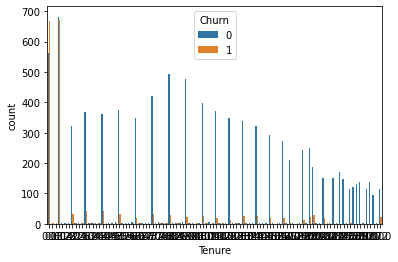

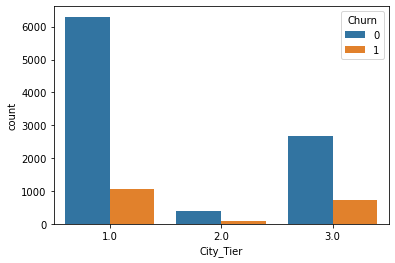

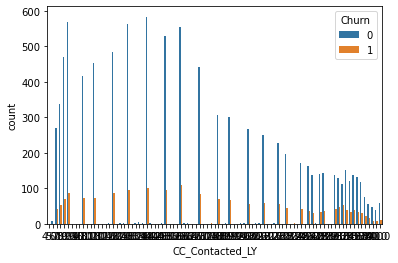

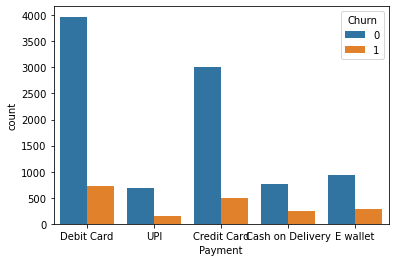

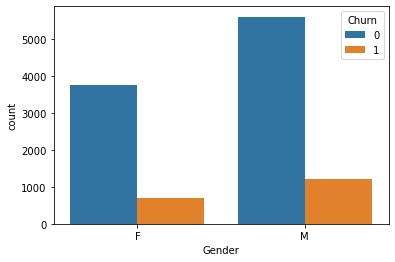

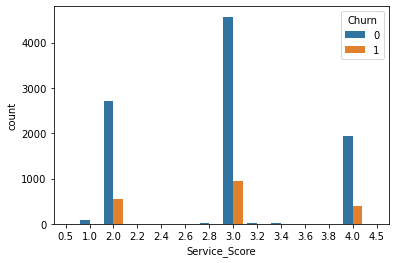

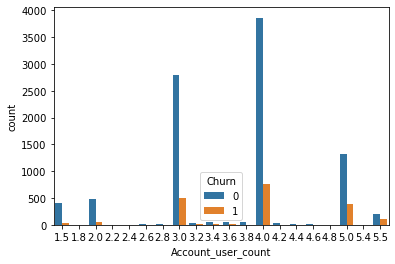

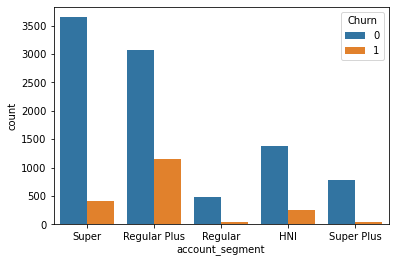

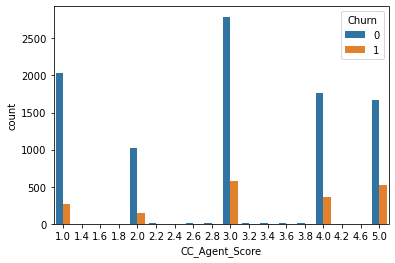

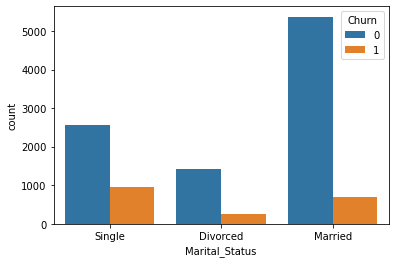

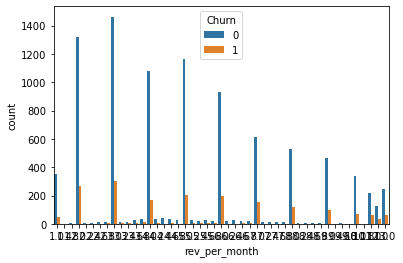

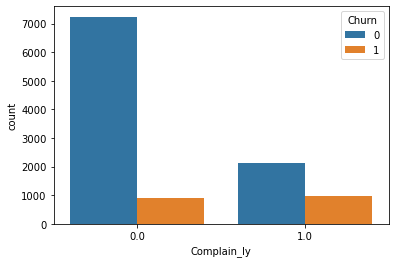

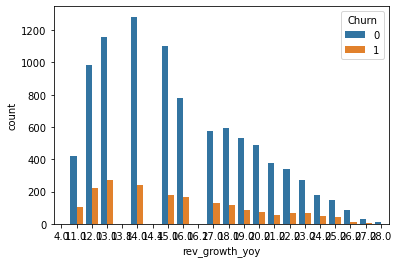

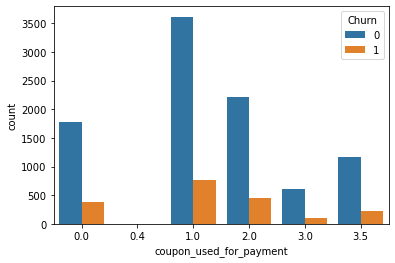

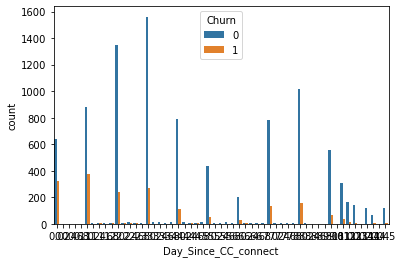

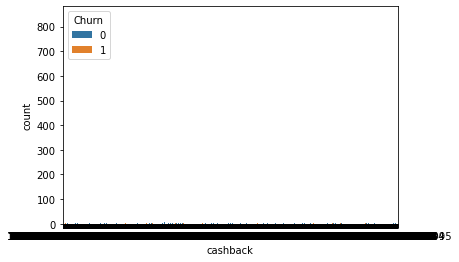

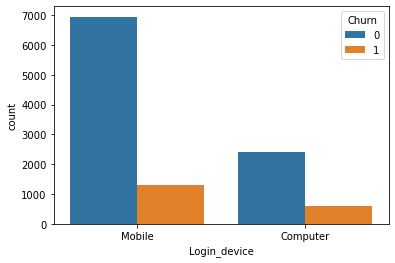

In [73]:
for i, predictor in enumerate(df.drop(columns=['Churn'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

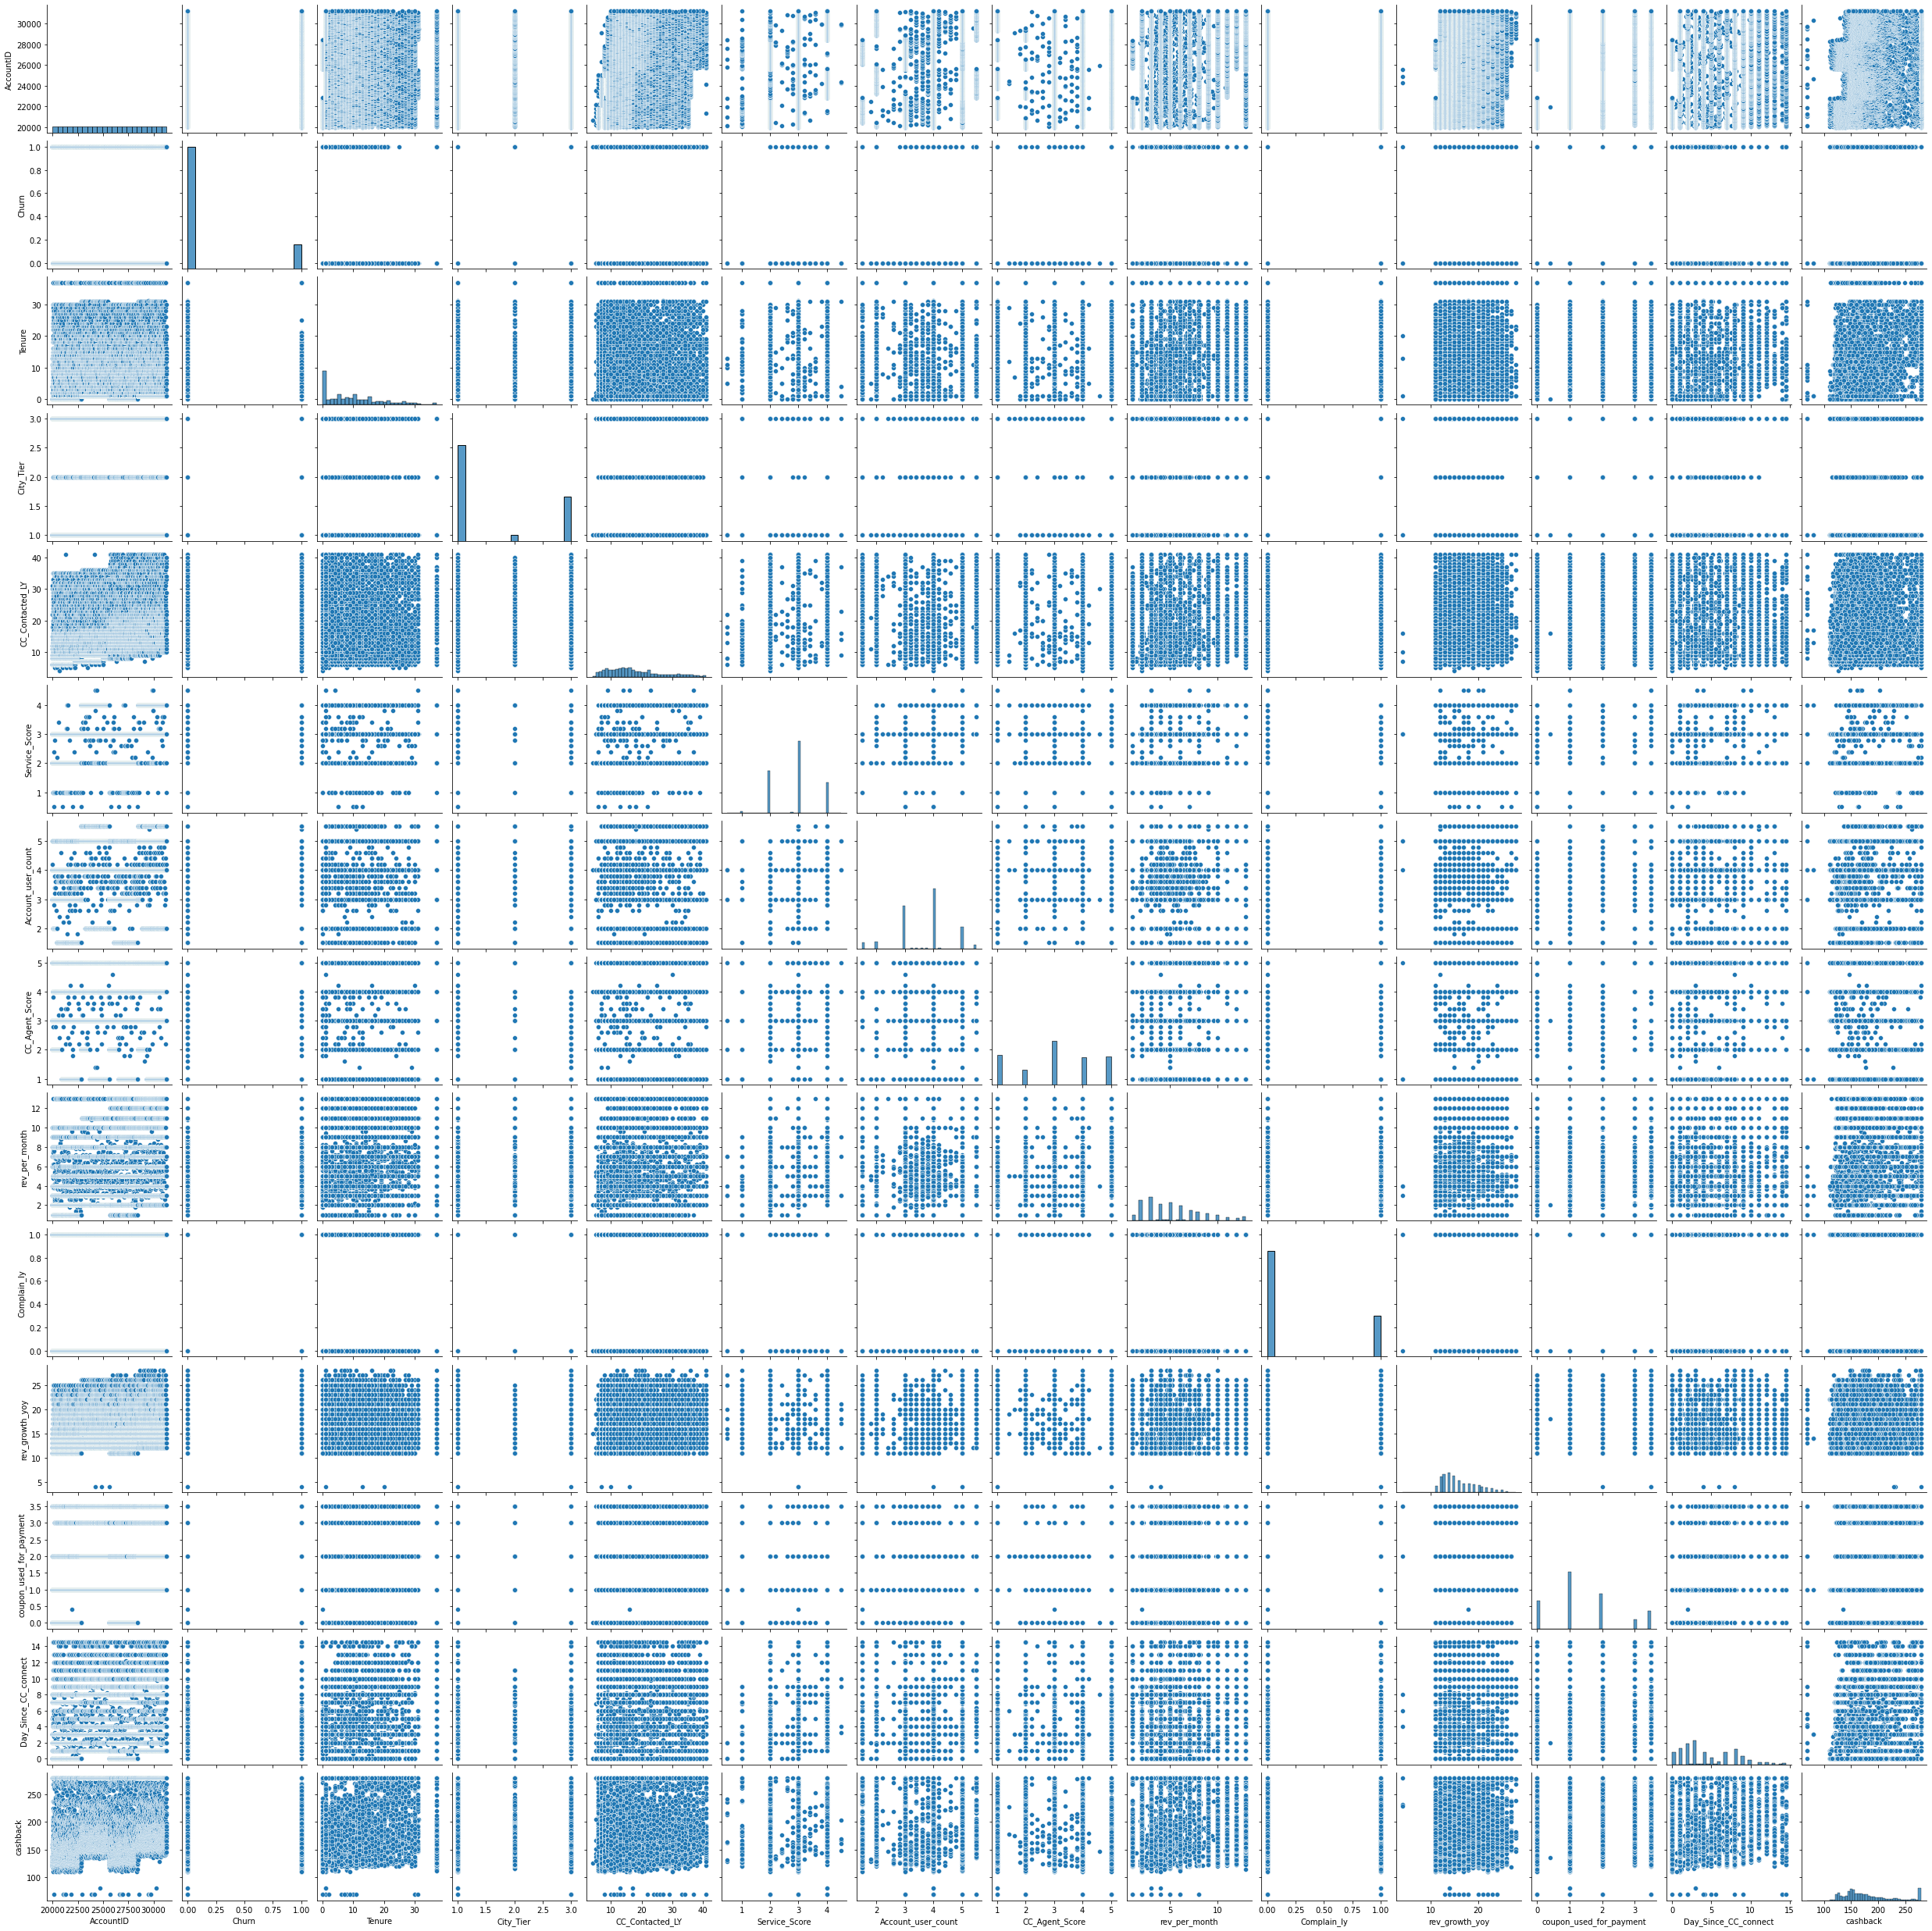

In [74]:
sns.pairplot(df)

<AxesSubplot:xlabel='Churn', ylabel='Account_user_count'>

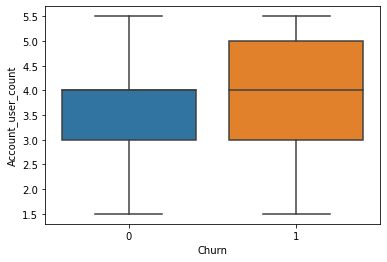

In [75]:
fig_dims = (12, 5)
sns.boxplot(x='Churn', y='Account_user_count', data=df)

<AxesSubplot:xlabel='Churn', ylabel='cashback'>

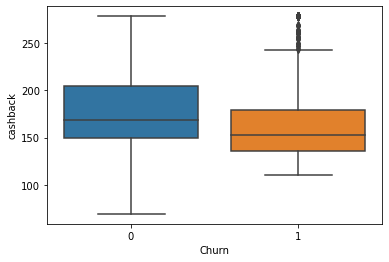

In [76]:
fig_dims = (12, 5)
sns.boxplot(x='Churn', y='cashback', data=df)

<AxesSubplot:xlabel='Churn', ylabel='Tenure'>

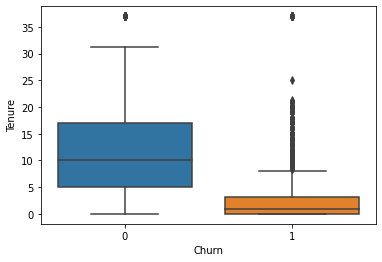

In [77]:
fig_dims = (12, 5)
sns.boxplot(x='Churn', y='Tenure', data=df)

<AxesSubplot:xlabel='Payment', ylabel='cashback'>

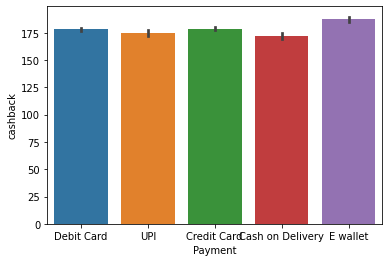

In [78]:
fig_dims = (20,20)
sns.barplot(x='Payment', y='cashback', data=df)

<AxesSubplot:xlabel='account_segment', ylabel='rev_per_month'>

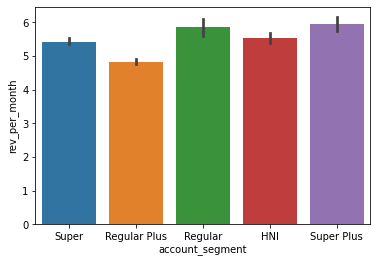

In [79]:
fig_dims = (12, 5)
sns.barplot(x='account_segment', y='rev_per_month', data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='coupon_used_for_payment'>

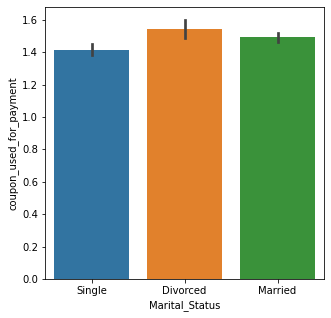

In [80]:
plt.figure(figsize=(5,5))
sns.barplot(x='Marital_Status', y='coupon_used_for_payment', data=df)

<AxesSubplot:xlabel='account_segment', ylabel='Tenure'>

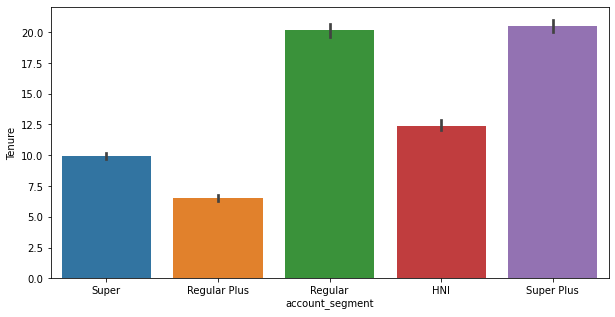

In [81]:
plt.figure(figsize=(10,5))
sns.barplot(x='account_segment', y='Tenure', data=df)

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:##008fb7;">1.7.3 Multivariate Analysis

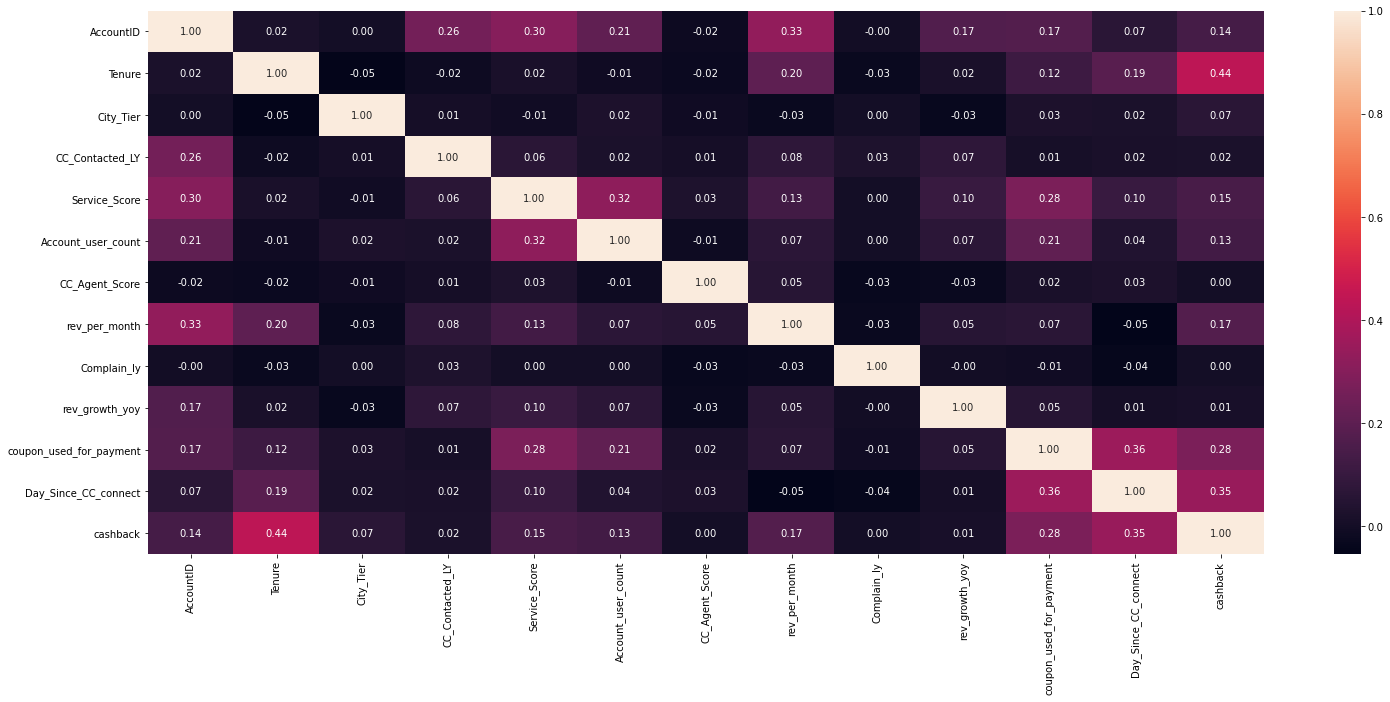

In [82]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

<AxesSubplot:xlabel='Marital_Status', ylabel='Tenure'>

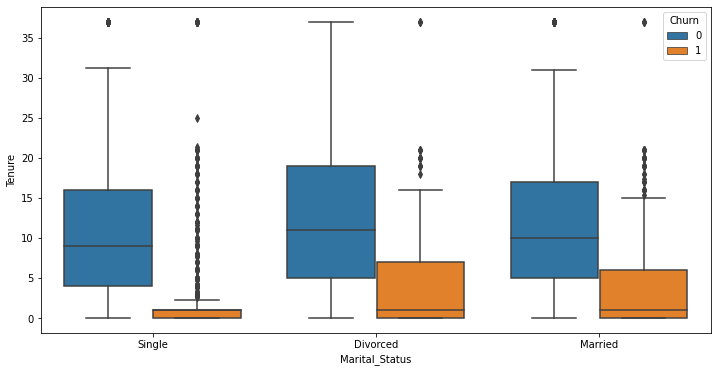

In [83]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Marital_Status', y='Tenure', hue='Churn',data=df)

In [84]:
df.skew()   # to measure the skeweness of every attribute

AccountID                  0.00000
Churn                      1.77261
Tenure                     0.80992
City_Tier                  0.75291
CC_Contacted_LY            0.79951
Service_Score              0.01507
Account_user_count        -0.29996
CC_Agent_Score            -0.14117
rev_per_month              0.78208
Complain_ly                1.00072
rev_growth_yoy             0.75277
coupon_used_for_payment    0.45965
Day_Since_CC_connect       0.72029
cashback                   0.91885
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2.1. Data Pre-Processing & Encoding

### Most of the machine learning models are designed to work on numeric data. Hence, we need to convert categorical text data into numerical data for model building

In [85]:
df.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

#### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea">Lable Encoding

<font color=darkblue>One-Hot-Encoding is used to create dummy variables to replace the categories in a categorical variable into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical value in the record

In [86]:
#Unique values in the categorical data

for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CHURN :  2
1    1896
0    9364
Name: Churn, dtype: int64


PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4696
Name: Payment, dtype: int64


GENDER :  2
F    4448
M    6812
Name: Gender, dtype: int64


ACCOUNT_SEGMENT :  5
Regular          520
Super Plus       818
HNI             1639
Super           4062
Regular Plus    4221
Name: account_segment, dtype: int64


MARITAL_STATUS :  3
Divorced    1668
Single      3520
Married     6072
Name: Marital_Status, dtype: int64


LOGIN_DEVICE :  2
Computer    3018
Mobile      8242
Name: Login_device, dtype: int64




In [87]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Churn
[1, 0]
Categories (2, int64): [0, 1]
[1 0]


feature: Payment
['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet']
Categories (5, object): ['Cash on Delivery', 'Credit Card', 'Debit Card', 'E wallet', 'UPI']
[2 4 1 0 3]


feature: Gender
['F', 'M']
Categories (2, object): ['F', 'M']
[0 1]


feature: account_segment
['Super', 'Regular Plus', 'Regular', 'HNI', 'Super Plus']
Categories (5, object): ['HNI', 'Regular', 'Regular Plus', 'Super', 'Super Plus']
[3 2 1 0 4]


feature: Marital_Status
['Single', 'Divorced', 'Married']
Categories (3, object): ['Divorced', 'Married', 'Single']
[2 0 1]


feature: Login_device
['Mobile', 'Computer']
Categories (2, object): ['Computer', 'Mobile']
[1 0]


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int8   
 2   Tenure                   11260 non-null  float64
 3   City_Tier                11260 non-null  float64
 4   CC_Contacted_LY          11260 non-null  float64
 5   Payment                  11260 non-null  int8   
 6   Gender                   11260 non-null  int8   
 7   Service_Score            11260 non-null  float64
 8   Account_user_count       11260 non-null  float64
 9   account_segment          11260 non-null  int8   
 10  CC_Agent_Score           11260 non-null  float64
 11  Marital_Status           11260 non-null  int8   
 12  rev_per_month            11260 non-null  float64
 13  Complain_ly              11260 non-null  float64
 14  rev_growth_yoy        

In [89]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.00000,3.00000,6.00000,2,0,3.00000,3.00000,3,2.00000,2,9.00000,1.00000,11.00000,1.00000,5.00000,159.93000,1
1,20001,1,0.00000,1.00000,8.00000,4,1,3.00000,4.00000,2,3.00000,2,7.00000,1.00000,15.00000,0.00000,0.00000,120.90000,1
2,20002,1,0.00000,1.00000,30.00000,2,1,2.00000,4.00000,2,3.00000,2,6.00000,1.00000,14.00000,0.00000,3.00000,137.48000,1
3,20003,1,0.00000,3.00000,15.00000,2,1,2.00000,4.00000,3,5.00000,2,8.00000,0.00000,23.00000,0.00000,3.00000,134.07000,1
4,20004,1,0.00000,1.00000,12.00000,1,1,2.00000,3.00000,2,5.00000,2,3.00000,0.00000,11.00000,1.00000,3.00000,129.60000,1


In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.00000,25629.50000,3250.62635,20000.00000,22814.75000,25629.50000,28444.25000,31259.00000
Churn,11260.00000,0.16838,0.37422,0.00000,0.00000,0.00000,0.00000,1.00000
Tenure,11260.00000,10.25599,8.91713,0.00000,2.00000,9.00000,16.00000,37.00000
City_Tier,11260.00000,1.64742,0.91276,1.00000,1.00000,1.00000,3.00000,3.00000
CC_Contacted_LY,11260.00000,17.82265,8.57335,4.00000,11.00000,16.00000,23.00000,41.00000
Payment,11260.00000,1.76217,1.00779,0.00000,1.00000,2.00000,2.00000,4.00000
Gender,11260.00000,0.60497,0.48888,0.00000,0.00000,1.00000,1.00000,1.00000
Service_Score,11260.00000,2.90338,0.72170,0.50000,2.00000,3.00000,3.00000,4.50000
Account_user_count,11260.00000,3.69690,0.92902,1.50000,3.00000,4.00000,4.00000,5.50000
account_segment,11260.00000,2.16874,1.11866,0.00000,2.00000,2.00000,3.00000,4.00000


#### Proportion of 1s and 0s


In [91]:
df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [92]:
df.Churn.value_counts(normalize=True)


0   0.83162
1   0.16838
Name: Churn, dtype: float64

In [93]:
df.City_Tier.value_counts(normalize=True)

1.00000   0.65497
3.00000   0.30240
2.00000   0.04263
Name: City_Tier, dtype: float64

In [94]:
df.Payment.value_counts(normalize=True)

2   0.41705
1   0.31181
3   0.10808
0   0.09005
4   0.07300
Name: Payment, dtype: float64

In [95]:
df.Gender.value_counts(normalize=True)

1   0.60497
0   0.39503
Name: Gender, dtype: float64

In [96]:
df.account_segment.value_counts(normalize=True)

2   0.37487
3   0.36075
0   0.14556
4   0.07265
1   0.04618
Name: account_segment, dtype: float64

In [97]:
df.Marital_Status.value_counts(normalize=True)

1   0.53925
2   0.31261
0   0.14813
Name: Marital_Status, dtype: float64

In [98]:
df.Complain_ly.value_counts(normalize=True)

0.00000   0.72371
1.00000   0.27629
Name: Complain_ly, dtype: float64

In [99]:
df.Login_device.value_counts(normalize=True)

1   0.73197
0   0.26803
Name: Login_device, dtype: float64

In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.00000,25629.50000,3250.62635,20000.00000,22814.75000,25629.50000,28444.25000,31259.00000
Churn,11260.00000,0.16838,0.37422,0.00000,0.00000,0.00000,0.00000,1.00000
Tenure,11260.00000,10.25599,8.91713,0.00000,2.00000,9.00000,16.00000,37.00000
City_Tier,11260.00000,1.64742,0.91276,1.00000,1.00000,1.00000,3.00000,3.00000
CC_Contacted_LY,11260.00000,17.82265,8.57335,4.00000,11.00000,16.00000,23.00000,41.00000
Payment,11260.00000,1.76217,1.00779,0.00000,1.00000,2.00000,2.00000,4.00000
Gender,11260.00000,0.60497,0.48888,0.00000,0.00000,1.00000,1.00000,1.00000
Service_Score,11260.00000,2.90338,0.72170,0.50000,2.00000,3.00000,3.00000,4.50000
Account_user_count,11260.00000,3.69690,0.92902,1.50000,3.00000,4.00000,4.00000,5.50000
account_segment,11260.00000,2.16874,1.11866,0.00000,2.00000,2.00000,3.00000,4.00000


In [101]:
df.drop(['AccountID'],axis=1,inplace=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int8   
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  int8   
 5   Gender                   11260 non-null  int8   
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  int8   
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  int8   
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

## SPLIT THE DATA IN TRAINING & TEST

In [323]:
# Copy all the predictor variables into X dataframe

## X is response variable/independent  

X = df.drop('Churn', axis=1)

# Copy target into the y dataframe. 
y = df[['Churn']]

In [324]:
X.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,4.00000,3.00000,6.00000,2,0,3.00000,3.00000,3,2.00000,2,9.00000,1.00000,11.00000,1.00000,5.00000,159.93000,1
1,0.00000,1.00000,8.00000,4,1,3.00000,4.00000,2,3.00000,2,7.00000,1.00000,15.00000,0.00000,0.00000,120.90000,1
2,0.00000,1.00000,30.00000,2,1,2.00000,4.00000,2,3.00000,2,6.00000,1.00000,14.00000,0.00000,3.00000,137.48000,1
3,0.00000,3.00000,15.00000,2,1,2.00000,4.00000,3,5.00000,2,8.00000,0.00000,23.00000,0.00000,3.00000,134.07000,1
4,0.00000,1.00000,12.00000,1,1,2.00000,3.00000,2,5.00000,2,3.00000,0.00000,11.00000,1.00000,3.00000,129.60000,1


In [325]:
X.shape

(11260, 17)

In [326]:
X.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,4.00000,3.00000,6.00000,2,0,3.00000,3.00000,3,2.00000,2,9.00000,1.00000,11.00000,1.00000,5.00000,159.93000,1
1,0.00000,1.00000,8.00000,4,1,3.00000,4.00000,2,3.00000,2,7.00000,1.00000,15.00000,0.00000,0.00000,120.90000,1
2,0.00000,1.00000,30.00000,2,1,2.00000,4.00000,2,3.00000,2,6.00000,1.00000,14.00000,0.00000,3.00000,137.48000,1
3,0.00000,3.00000,15.00000,2,1,2.00000,4.00000,3,5.00000,2,8.00000,0.00000,23.00000,0.00000,3.00000,134.07000,1
4,0.00000,1.00000,12.00000,1,1,2.00000,3.00000,2,5.00000,2,3.00000,0.00000,11.00000,1.00000,3.00000,129.60000,1


# Generate training and test datasets

### Let’s decouple the master dataset into training and test set with an 70%-30% ratio.

In [327]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [328]:
#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7882, 17)
Number transactions y_train dataset:  (7882, 1)
Number transactions X_test dataset:  (3378, 17)
Number transactions y_test dataset:  (3378, 1)


<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#00b3e5;">3.1. MODEL BUILDING

<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#00b3e5;">3.1. Logistic Regression

In [329]:
from sklearn.linear_model import LogisticRegression
# Fit the Logistic Regression model
model_lr=LogisticRegression(random_state=1)
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Predicting on train and test datasets

In [330]:
ytrain_predict_lr = model_lr.predict(X_train)
ytest_predict_lr = model_lr.predict(X_test)

### Getting predicted classes and probabilities

In [331]:
ytest_predict_lr_prob = model_lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_lr_prob).head()

,0,1
0,0.42208,0.57792
1,0.36277,0.63723
2,0.94670,0.05330
3,0.63996,0.36004
4,0.98334,0.01666


### Accuracy on training set

In [332]:
# Accuracy - Training Data

logistic_train_acc = model_lr.score(X_train, y_train)
logistic_train_acc

0.8802334432885055

### Accuracy on test set

In [333]:
# Accuracy - Test Data
logistic_test_acc = model_lr.score(X_test, y_test)
logistic_test_acc

0.8812907045589106

### AUC and ROC for the training data - LR

AUC: 0.866


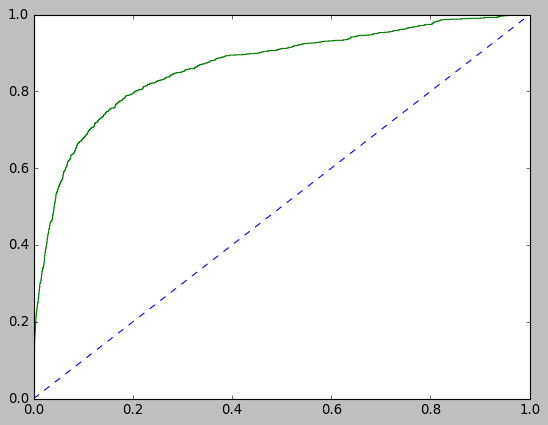

In [334]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

# predict probabilities
probs_lr_train = model_lr.predict_proba(X_train)
# keep probabilities for active customers only
probs_lr_train_active = probs_lr_train[:, 1]
# calculate AUC
auc_lr_train = roc_auc_score(y_train, probs_lr_train_active)
print('AUC: %.3f' % auc_lr_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_lr_train_active)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

### AUC and ROC for the test data - LR

AUC: 0.869


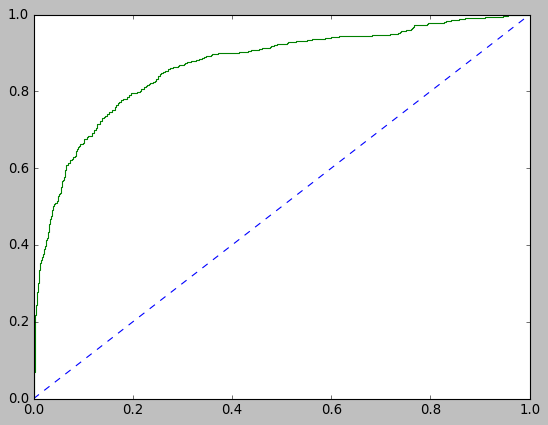

In [335]:
# predict probabilities
probs_lr_test = model_lr.predict_proba(X_test)
# keep probabilities for active customer only
probs_lr_test = probs_lr_test[:, 1]
# calculate AUC
auc_lr_test = roc_auc_score(y_test, probs_lr_test)
print('AUC: %.3f' % auc_lr_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_lr_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

### Confusion matrix for TRAIN DATA - LOGISTIC REGRESSION

In [336]:
confusion_matrix(y_train, ytrain_predict_lr)


array([[6346,  210],
       [ 734,  592]], dtype=int64)

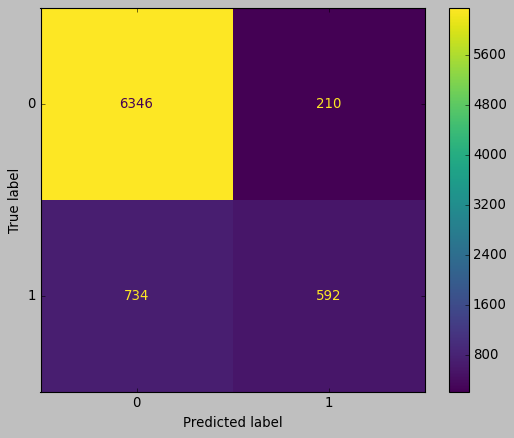

In [337]:
plot_confusion_matrix(model_lr,X_train,y_train);

In [338]:
print(classification_report(y_train, ytrain_predict_lr))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6556
           1       0.74      0.45      0.56      1326

    accuracy                           0.88      7882
   macro avg       0.82      0.71      0.74      7882
weighted avg       0.87      0.88      0.87      7882



In [339]:
logistic_metrics=classification_report(y_train, ytrain_predict_lr,output_dict=True)
df99=pd.DataFrame(logistic_metrics).transpose()
activecustomers_precision_train_lr=round(df99.loc["0"][0],2)
activecustomers_recall_train_lr=round(df99.loc["0"][1],2)
activecustomers_f1_train_lr=round(df99.loc["0"][2],2)
churncustomer_precision_train_lr=round(df99.loc["1"][0],2)
churncustomer_recall_train_lr=round(df99.loc["1"][1],2)
churncustomer_f1_train_lr=round(df99.loc["1"][2],2)
print ('activecustomers_train_precision ',activecustomers_precision_train_lr)
print ('activecustomers_train_recall ',activecustomers_recall_train_lr)
print ('activecustomers_train_f1 ',activecustomers_f1_train_lr)
print ('churncustomer_train_precision ',churncustomer_precision_train_lr)
print ('churncustomer_train_recall ',churncustomer_recall_train_lr)
print ('churncustomer_train_f1 ',churncustomer_f1_train_lr)

activecustomers_train_precision  0.9
activecustomers_train_recall  0.97
activecustomers_train_f1  0.93
churncustomer_train_precision  0.74
churncustomer_train_recall  0.45
churncustomer_train_f1  0.56


### Confusion matrix for TEST DATA - LOGISTIC REGRESSION


In [340]:
confusion_matrix(y_test, ytest_predict_lr)

array([[2713,   95],
       [ 306,  264]], dtype=int64)

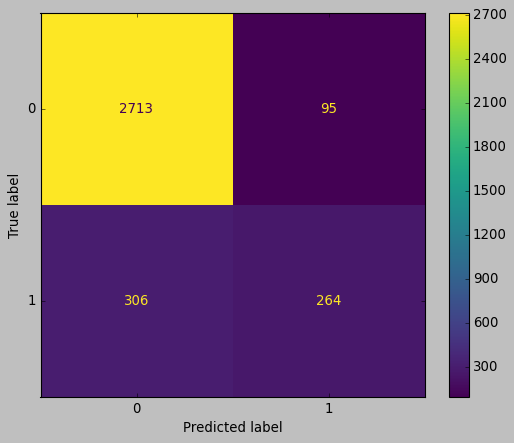

In [341]:
plot_confusion_matrix(model_lr,X_test,y_test);

In [342]:
print(classification_report(y_test, ytest_predict_lr))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2808
           1       0.74      0.46      0.57       570

    accuracy                           0.88      3378
   macro avg       0.82      0.71      0.75      3378
weighted avg       0.87      0.88      0.87      3378



In [343]:
logistic_metrics=classification_report(y_test, ytest_predict_lr,output_dict=True)
df98=pd.DataFrame(logistic_metrics).transpose()
activecustomer_precision_test_lr=round(df98.loc["0"][0],2)
activecustomer_recall_test_lr=round(df98.loc["0"][1],2)
activecustomer_f1_test_lr=round(df98.loc["0"][2],2)
churncustomer_precision_test_lr=round(df98.loc["1"][0],2)
churncustomer_recall_test_lr=round(df98.loc["1"][1],2)
churncustomer_f1_test_lr=round(df98.loc["1"][2],2)
print ('activecustomer_test_precision ',activecustomer_precision_test_lr)
print ('activecustomer_test_recall ',activecustomer_recall_test_lr)
print ('activecustomer_test_f1 ',activecustomer_f1_test_lr)
print ('churncustomer_test_precision ',churncustomer_precision_test_lr)
print ('churncustomer_test_recall ',churncustomer_recall_test_lr)
print ('churncustomer_test_f1 ',churncustomer_f1_test_lr)

activecustomer_test_precision  0.9
activecustomer_test_recall  0.97
activecustomer_test_f1  0.93
churncustomer_test_precision  0.74
churncustomer_test_recall  0.46
churncustomer_test_f1  0.57


<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#00b3e5;">3.2. Random Forest

In [351]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [354]:
#feature importance

for i,column in enumerate (df.drop('Churn', axis = 1)):
    print('The feature importance for {} is: {}'.format(column, model_rf.feature_importances_[i]))

The feature importance for Tenure is: 0.4714751425781082
The feature importance for City_Tier is: 0.02162061339150778
The feature importance for CC_Contacted_LY is: 0.025813504978108838
The feature importance for Payment is: 0.02397856473515222
The feature importance for Gender is: 0.00441048306203581
The feature importance for Service_Score is: 0.003599227584281578
The feature importance for Account_user_count is: 0.01863280683496002
The feature importance for account_segment is: 0.03985053153803423
The feature importance for CC_Agent_Score is: 0.032341348769441704
The feature importance for Marital_Status is: 0.05044592087440693
The feature importance for rev_per_month is: 0.03110920361533587
The feature importance for Complain_ly is: 0.12062845371799207
The feature importance for rev_growth_yoy is: 0.016815332718326696
The feature importance for coupon_used_for_payment is: 0.009165829136065251
The feature importance for Day_Since_CC_connect is: 0.07226338789535279
The feature import

In [353]:
ytrain_predict_rf = model_rf.predict(X_train)
ytest_predict_rf = model_rf.predict(X_test)

### Getting predicted classes and probabilities - RF

In [126]:
ytest_predict_rf_prob = model_rf.predict_proba(X_test)
pd.DataFrame(ytest_predict_rf_prob).head()

,0,1
0,0.27721,0.72279
1,0.39535,0.60465
2,0.95950,0.04050
3,0.53264,0.46736
4,0.97536,0.02464


### Accuracy on training set -  RF


In [127]:
# Accuracy - Training Data

model_rf.score(X_train,y_train)

0.9089063689418929

### Accuracy on Test Set  - RF

In [128]:
# Accuracy - Test Data

model_rf.score(X_test, y_test)

0.9029011249259917

### AUC and ROC for the training data - RF

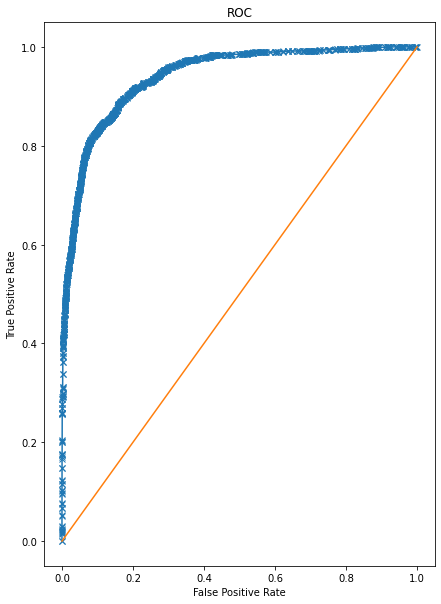

Area under Curve is 0.9408274644160944


In [129]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,model_rf.predict_proba(X_train)[:,1])
plt.figure(figsize=(7,10))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,model_rf.predict_proba(X_train)[:,1]))

### AUC and ROC for the Test data - RF

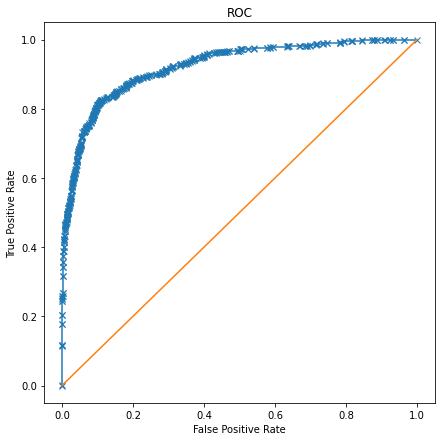

Area under Curve is 0.922716424251512


In [130]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,model_rf.predict_proba(X_test)[:,1])
plt.figure(figsize=(7,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,model_rf.predict_proba(X_test)[:,1]))

### Confusion matrix for TRAIN DATA - Random Forest

In [131]:
from sklearn.metrics import confusion_matrix,classification_report


In [132]:
confusion_matrix(ytrain_predict_rf, y_train)

array([[6456,  618],
       [ 100,  708]], dtype=int64)

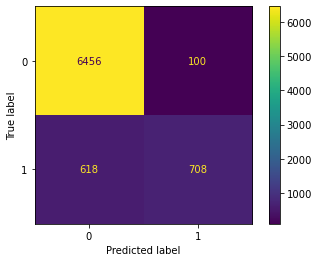

In [133]:
plot_confusion_matrix(model_rf,X_train,y_train);

In [134]:
print(classification_report(y_train, ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      6556
           1       0.88      0.53      0.66      1326

    accuracy                           0.91      7882
   macro avg       0.89      0.76      0.81      7882
weighted avg       0.91      0.91      0.90      7882



In [135]:
randomforest_metrics_train=classification_report(y_train, ytrain_predict_rf,output_dict=True)
df97=pd.DataFrame(randomforest_metrics_train).transpose()
activecustomer_precision_train_rf=round(df97.loc["0"][0],2)
activecustomer_recall_train_rf=round(df97.loc["0"][1],2)
activecustomer_f1_train_rf=round(df97.loc["0"][2],2)
churncustomer_precision_train_rf=round(df97.loc["1"][0],2)
churncustomer_recall_train_rf=round(df97.loc["1"][1],2)
churncustomer_f1_train_rf=round(df97.loc["1"][2],2)
print ('activecustomer_train_precision ',activecustomer_precision_train_rf)
print ('activecustomer_train_recall ',activecustomer_recall_train_rf)
print ('activecustomer_train_f1 ',activecustomer_f1_train_rf)
print ('churncustomer_train_precision ',churncustomer_precision_train_rf)
print ('churncustomer_train_recall ',churncustomer_recall_train_rf)
print ('churncustomer_train_f1 ',churncustomer_f1_train_rf)

activecustomer_train_precision  0.91
activecustomer_train_recall  0.98
activecustomer_train_f1  0.95
churncustomer_train_precision  0.88
churncustomer_train_recall  0.53
churncustomer_train_f1  0.66


### Confusion matrix for TEST  DATA - Random Forest

In [136]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test, ytest_predict_rf)

array([[2756,   52],
       [ 276,  294]], dtype=int64)

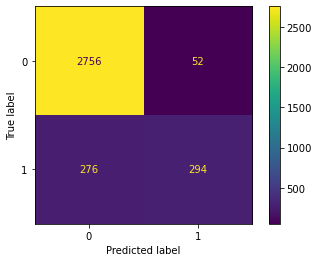

In [137]:
plot_confusion_matrix(model_rf,X_test,y_test);

In [138]:
print(classification_report(y_test, ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2808
           1       0.85      0.52      0.64       570

    accuracy                           0.90      3378
   macro avg       0.88      0.75      0.79      3378
weighted avg       0.90      0.90      0.89      3378



In [139]:
randomforest_metrics_test=classification_report(y_test, ytest_predict_rf,output_dict=True)
df96=pd.DataFrame(randomforest_metrics_test).transpose()
activecustomer_precision_test_rf=round(df96.loc["0"][0],2)
activecustomer_recall_test_rf=round(df96.loc["0"][1],2)
activecustomer_f1_test_rf=round(df96.loc["0"][2],2)
churncustomer_precision_test_rf=round(df96.loc["1"][0],2)
churncustomer_recall_test_rf=round(df96.loc["1"][1],2)
churncustomer_f1_test_rf=round(df96.loc["1"][2],2)
print ('activecustomer_test_precision ',activecustomer_precision_test_rf)
print ('activecustomer_test_recall ',activecustomer_recall_test_rf)
print ('activecustomer_test_f1 ',activecustomer_f1_test_rf)
print ('churncustomer_test_precision ',churncustomer_precision_test_rf)
print ('churncustomer_test_recall ',churncustomer_recall_test_rf)
print ('churncustomer_test_f1 ',churncustomer_f1_test_rf)

activecustomer_test_precision  0.91
activecustomer_test_recall  0.98
activecustomer_test_f1  0.94
churncustomer_test_precision  0.85
churncustomer_test_recall  0.52
churncustomer_test_f1  0.64


**Result:**

Area under the curve on the training data is 93%, which indicates very high performance that all classes have been correctly classified. Whereas on the test data model performance is average with AUC 92%, which is at par to the performance of the training data.

Since we are building a model to predict if a person will have churn or not, for practical purposes, we will be more interested in correctly classifying 1 (churning/leaving the service provider) than 0(Retained customer/Not Churning).

If a person not churning, is incorrectly predicted to have churned, in this situation, the cost of new customer acquisition and marketing campaigns will be high, than when we incorrectly predict a person, who actually has churned, as not having churned

From the Random Forest model,looking at the Accuracy,Sensitivity,Speficity,Recall and AUC, we over 90% results on the training data, whereas on the Test data, performance is lesser,especially in predicting Class 1.

This is because overfitting has happened on the training data, and therefore the model is weak in generalizing and predicting any new data.

In this model, we have hard-coded the hyper parameter values. We can optimize/fine-tune the random forest model, by trying different values for the hyper parameters to see if the model performance is improving.

<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#00b3e5;">3.3. BOOSTING

In [140]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [141]:
import xgboost as xgb
XGB_model = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
XGB_model.fit(X_train, y_train)

[08:46:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Predicting on train and test datasets

In [142]:
ytrain_predict_xgb = XGB_model.predict(X_train)
ytest_predict_xgb = XGB_model.predict(X_test)

### Getting predicted classes and probabilities

In [143]:
ytest_predict_xgb_prob = XGB_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_xgb_prob).head()

,0,1
0,0.37779,0.62221
1,0.31402,0.68598
2,0.79542,0.20458
3,0.48068,0.51932
4,0.79691,0.20309


### Accuracy on training set

In [144]:
# Accuracy - Train Data
xgb_train_acc = XGB_model.score(X_train, y_train)
xgb_train_acc

0.9278102004567369

### Accuracy on test set

In [145]:
# Accuracy - Test Data
xgb_test_acc = XGB_model.score(X_test, y_test)
xgb_test_acc

0.9138543516873889

### AUC and ROC for the training data

AUC: 0.948


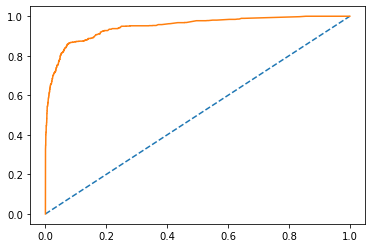

In [146]:
# predict probabilities
probs_xgb_train = XGB_model.predict_proba(X_train)
# keep probabilities for NOT CHURNED CUSTOMERS ONLY
probs_xgb_train_churncustomer = probs_xgb_train[:, 1]
# calculate AUC
auc_xgb_train = roc_auc_score(y_train, probs_xgb_train_churncustomer)
print('AUC: %.3f' % auc_xgb_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_xgb_train_churncustomer)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

### AUC and ROC for the test data

AUC: 0.923


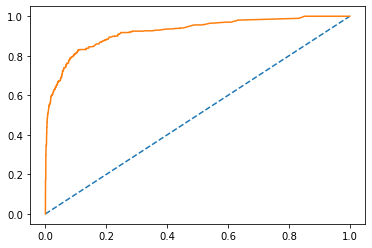

In [147]:
# predict probabilities
probs_xgb_test = XGB_model.predict_proba(X_test)
# keep probabilities for not churned customers only
probs_xgb_test = probs_xgb_test[:, 1]
# calculate AUC
auc_xgb_test = roc_auc_score(y_test, probs_xgb_test)
print('AUC: %.3f' % auc_xgb_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_xgb_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

### Confusion matrix for training data -  BOOSTING

In [148]:
confusion_matrix(y_train, ytrain_predict_xgb)

array([[6398,  158],
       [ 411,  915]], dtype=int64)

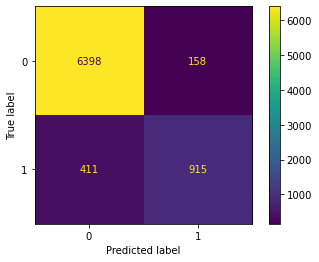

In [149]:
plot_confusion_matrix(XGB_model,X_train,y_train);

In [150]:
print(classification_report(y_train, ytrain_predict_xgb))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6556
           1       0.85      0.69      0.76      1326

    accuracy                           0.93      7882
   macro avg       0.90      0.83      0.86      7882
weighted avg       0.93      0.93      0.92      7882



In [151]:
xgb_metrics_train=classification_report(y_train, ytrain_predict_xgb,output_dict=True)
df95=pd.DataFrame(xgb_metrics_train).transpose()
activecustomer_precision_train_xgb=round(df95.loc["0"][0],2)
activecustomer_recall_train_xgb=round(df95.loc["0"][1],2)
activecustomer_f1_train_xgb=round(df95.loc["0"][2],2)
churncustomer_precision_train_xgb=round(df95.loc["1"][0],2)
churncustomer_recall_train_xgb=round(df95.loc["1"][1],2)
churncustomer_f1_train_xgb=round(df95.loc["1"][2],2)
print ('activecustomer_train_precision ',activecustomer_precision_train_xgb)
print ('activecustomer_train_recall ',activecustomer_recall_train_xgb)
print ('activecustomer_train_f1 ',activecustomer_f1_train_xgb)
print ('churncustomer_train_precision ',churncustomer_precision_train_xgb)
print ('churncustomer_train_recall ',churncustomer_recall_train_xgb)
print ('churncustomer_train_f1 ',churncustomer_f1_train_xgb)

activecustomer_train_precision  0.94
activecustomer_train_recall  0.98
activecustomer_train_f1  0.96
churncustomer_train_precision  0.85
churncustomer_train_recall  0.69
churncustomer_train_f1  0.76


### Confusion matrix for test data -  BOOSTING

In [152]:
confusion_matrix(y_test, ytest_predict_xgb)

array([[2729,   79],
       [ 212,  358]], dtype=int64)

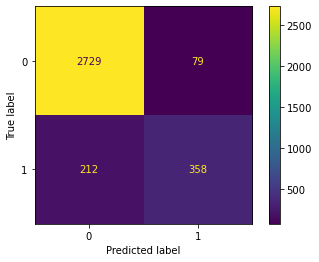

In [153]:
plot_confusion_matrix(XGB_model,X_test,y_test);

In [154]:
print(classification_report(y_test, ytest_predict_xgb))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2808
           1       0.82      0.63      0.71       570

    accuracy                           0.91      3378
   macro avg       0.87      0.80      0.83      3378
weighted avg       0.91      0.91      0.91      3378



In [155]:
xgb_metrics_test=classification_report(y_test, ytest_predict_xgb,output_dict=True)
df94=pd.DataFrame(xgb_metrics_test).transpose()
activecustomer_precision_test_xgb=round(df94.loc["0"][0],2)
activecustomer_recall_test_xgb=round(df94.loc["0"][1],2)
activecustomer_f1_test_xgb=round(df94.loc["0"][2],2)
churncustomer_precision_test_xgb=round(df94.loc["1"][0],2)
churncustomer_recall_test_xgb=round(df94.loc["1"][1],2)
churncustomer_f1_test_xgb=round(df94.loc["1"][2],2)
print ('activecustomer_test_precision ',activecustomer_precision_test_xgb)
print ('activecustomer_test_recall ',activecustomer_recall_test_xgb)
print ('activecustomer_test_f1 ',activecustomer_f1_test_xgb)
print ('churncustomer_test_precision ',churncustomer_precision_test_xgb)
print ('churncustomer_test_recall ',churncustomer_recall_test_xgb)
print ('churncustomer_test_f1 ',churncustomer_f1_test_xgb)

activecustomer_test_precision  0.93
activecustomer_test_recall  0.97
activecustomer_test_f1  0.95
churncustomer_test_precision  0.82
churncustomer_test_recall  0.63
churncustomer_test_f1  0.71


<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#00b3e5;">3.4. LDA

In [156]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Build LDA Model and fit the data
clf=LinearDiscriminantAnalysis()
model_lda = clf.fit(X_train, y_train)
model_lda

LinearDiscriminantAnalysis()

### Predicting on train and test datasets

In [157]:
ytrain_predict_lda = model_lda.predict(X_train)
ytest_predict_lda = model_lda.predict(X_test)

### Getting predicted classes and probabilities

In [158]:
ytest_predict_lda_prob = model_lda.predict_proba(X_test)
pd.DataFrame(ytest_predict_lda_prob).head()

,0,1
0,0.56124,0.43876
1,0.51659,0.48341
2,0.92640,0.07360
3,0.78879,0.21121
4,0.97925,0.02075


### Accuracy on training set

In [159]:
# Accuracy - Test Data
lda_train_acc = model_lda.score(X_train, y_train)
lda_train_acc

0.8755392032479066

### Accuracy on test set

In [160]:
# Accuracy - Test Data
lda_test_acc = model_lda.score(X_test, y_test)
lda_test_acc

0.8804026050917703

### AUC and ROC for the training data

AUC: 0.858


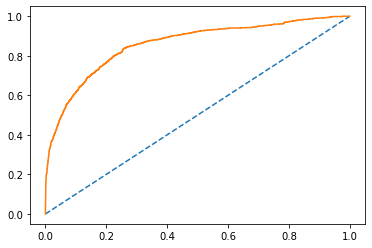

In [161]:
# predict probabilities
probs_lda_train = model_lda.predict_proba(X_train)
# keep probabilities for active customers
probs_lda_train_activecustomers = probs_lda_train[:, 1]
# calculate AUC
auc_lda_train = roc_auc_score(y_train, probs_lda_train_activecustomers)
print('AUC: %.3f' % auc_lda_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_lda_train_activecustomers)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

### AUC and ROC for the test data

AUC: 0.858


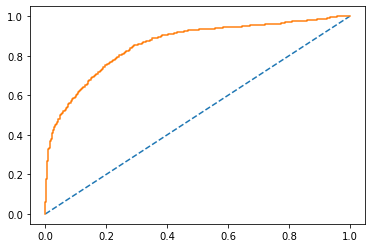

In [162]:
# predict probabilities
probs_lda_test = model_lda.predict_proba(X_test)
# keep probabilities for active customers
probs_lda_test = probs_lda_test[:, 1]
# calculate AUC
auc_lda_test = roc_auc_score(y_test, probs_lda_test)
print('AUC: %.3f' % auc_lda_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_lda_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

#### Confusion matrix for training data

In [163]:
confusion_matrix(y_train, ytrain_predict_lda)

array([[6375,  181],
       [ 800,  526]], dtype=int64)

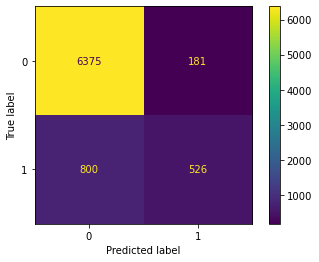

In [164]:
plot_confusion_matrix(model_lda,X_train,y_train);

In [165]:
print(classification_report(y_train, ytrain_predict_lda))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6556
           1       0.74      0.40      0.52      1326

    accuracy                           0.88      7882
   macro avg       0.82      0.68      0.72      7882
weighted avg       0.86      0.88      0.86      7882



In [166]:
lda_metrics_train=classification_report(y_train, ytrain_predict_lda,output_dict=True)
df93=pd.DataFrame(lda_metrics_train).transpose()
activecustomer_precision_train_lda=round(df93.loc["0"][0],2)
activecustomer_recall_train_lda=round(df93.loc["0"][1],2)
activecustomer_f1_train_lda=round(df93.loc["0"][2],2)
churncustomer_precision_train_lda=round(df93.loc["1"][0],2)
churncustomer_recall_train_lda=round(df93.loc["1"][1],2)
churncustomer_f1_train_lda=round(df93.loc["1"][2],2)
print ('activecustomer ',activecustomer_precision_train_lda)
print ('activecustomer_train_recall',activecustomer_recall_train_lda)
print ('activecustomer_train_f1',activecustomer_f1_train_lda)
print ('churncustomer_train_precision',churncustomer_precision_train_lda)
print ('churncustomer_train_recall',churncustomer_recall_train_lda)
print ('churncustomer_train_f1',churncustomer_f1_train_lda)

activecustomer  0.89
activecustomer_train_recall 0.97
activecustomer_train_f1 0.93
churncustomer_train_precision 0.74
churncustomer_train_recall 0.4
churncustomer_train_f1 0.52


### Confusion matrix for test data

In [167]:
confusion_matrix(y_test, ytest_predict_lda)

array([[2739,   69],
       [ 335,  235]], dtype=int64)

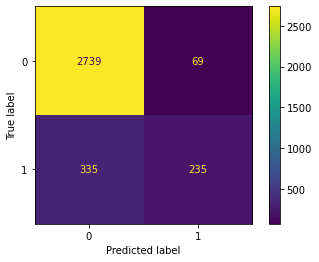

In [168]:
plot_confusion_matrix(model_lda,X_test,y_test);

In [169]:
print(classification_report(y_test, ytest_predict_lda))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2808
           1       0.77      0.41      0.54       570

    accuracy                           0.88      3378
   macro avg       0.83      0.69      0.73      3378
weighted avg       0.87      0.88      0.86      3378



In [170]:
lda_metrics_test=classification_report(y_test, ytest_predict_lda,output_dict=True)
df92=pd.DataFrame(lda_metrics_test).transpose()
activecustomers_precision_test_lda=round(df92.loc["0"][0],2)
activecustomers_recall_test_lda=round(df92.loc["0"][1],2)
activecustomers_f1_test_lda=round(df92.loc["0"][2],2)
churncustomer_precision_test_lda=round(df92.loc["1"][0],2)
churncustomer_recall_test_lda=round(df92.loc["1"][1],2)
churncustomer_f1_test_lda=round(df92.loc["1"][2],2)
print ('activecustomers_test_precision',activecustomers_precision_test_lda)
print ('activecustomers_test_recall',activecustomers_recall_test_lda)
print ('activecustomers_test_f1',activecustomers_f1_test_lda)
print ('churncustomer_test_precision',churncustomer_precision_test_lda)
print ('churncustomer_test_recall',churncustomer_recall_test_lda)
print ('churncustomer_test_f1 ',churncustomer_f1_test_lda)

activecustomers_test_precision 0.89
activecustomers_test_recall 0.98
activecustomers_test_f1 0.93
churncustomer_test_precision 0.77
churncustomer_test_recall 0.41
churncustomer_test_f1  0.54


<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#00b3e5;">3.5. KNN

In [171]:
X_trains,X_tests,y_trains,y_tests=train_test_split(X, y, test_size = 0.30, random_state = 123)

In [172]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()
KNN_model.fit(X_trains, y_trains)

KNeighborsClassifier()

### Predicting on train and test datasets

In [173]:
ytrain_predict_knn = KNN_model.predict(X_trains)
ytest_predict_knn = KNN_model.predict(X_tests)

### Getting predicted classes and probabilities


In [174]:
ytest_predict_knn_prob = KNN_model.predict_proba(X_tests)
pd.DataFrame(ytest_predict_knn_prob).head()

,0,1
0,1.00000,0.00000
1,1.00000,0.00000
2,0.20000,0.80000
3,0.60000,0.40000
4,1.00000,0.00000


### Accuracy on training set

In [175]:
# Accuracy - Test Data
knn_train_acc = KNN_model.score(X_trains, y_trains)
knn_train_acc

0.9248921593504187

### Accuracy on test set

In [176]:
# Accuracy - Test Data
knn_test_acc = KNN_model.score(X_tests, y_tests)
knn_test_acc

0.8762581409117821

### AUC and ROC for the training data


AUC: 0.968


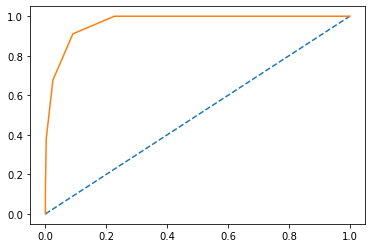

In [177]:
# predict probabilities
probs_knn_trains = KNN_model.predict_proba(X_trains)
# keep probabilities for active customers
probs_knn_trains_activecustomers = probs_knn_trains[:, 1]
# calculate AUC
auc_knn_trains = roc_auc_score(y_trains, probs_knn_trains_activecustomers)
print('AUC: %.3f' % auc_knn_trains)
# calculate roc curve
trains_fpr, trains_tpr, trains_thresholds = roc_curve(y_trains, probs_knn_trains_activecustomers)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(trains_fpr, trains_tpr)

### AUC and ROC for the test data


AUC: 0.874


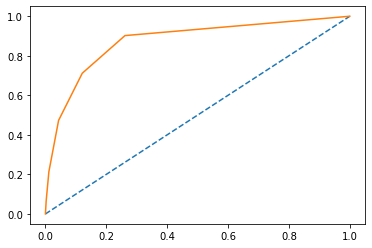

In [178]:
# predict probabilities
probs_knn_tests = KNN_model.predict_proba(X_tests)
# keep probabilities for Labour party only
probs_knn_tests = probs_knn_tests[:, 1]
# calculate AUC
auc_knn_tests = roc_auc_score(y_tests, probs_knn_tests)
print('AUC: %.3f' % auc_knn_tests)
# calculate roc curve
tests_fpr, tests_tpr, tests_thresholds = roc_curve(y_tests, probs_knn_tests)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(tests_fpr, tests_tpr)

### Confusion matrix for training data

In [179]:
confusion_matrix(y_trains, ytrain_predict_knn)

array([[6387,  161],
       [ 431,  903]], dtype=int64)

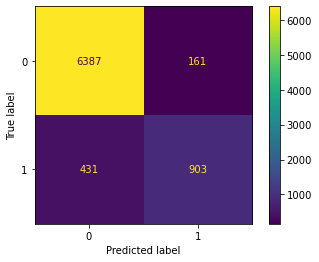

In [180]:
plot_confusion_matrix(KNN_model,X_trains,y_trains);

In [181]:
print(classification_report(y_trains, ytrain_predict_knn))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6548
           1       0.85      0.68      0.75      1334

    accuracy                           0.92      7882
   macro avg       0.89      0.83      0.85      7882
weighted avg       0.92      0.92      0.92      7882



In [182]:
knn_metrics_trains=classification_report(y_trains, ytrain_predict_knn,output_dict=True)
df91=pd.DataFrame(knn_metrics_trains).transpose()
activecustomers_precision_trains_knn=round(df91.loc["0"][0],2)
activecustomers_recall_trains_knn=round(df91.loc["0"][1],2)
activecustomers_f1_trains_knn=round(df91.loc["0"][2],2)
churncustomer_precision_trains_knn=round(df91.loc["1"][0],2)
churncustomer_recall_trains_knn=round(df91.loc["1"][1],2)
churncustomer_f1_trains_knn=round(df91.loc["1"][2],2)
print ('activecustomers_trains_precision ',activecustomers_precision_trains_knn)
print ('activecustomers_trains_recall ',activecustomers_recall_trains_knn)
print ('activecustomers_trains_f1 ',activecustomers_f1_trains_knn)
print ('churncustomer_trains_precision ',churncustomer_precision_trains_knn)
print ('churncustomer_trains_recall ',churncustomer_recall_trains_knn)
print ('churncustomer_trains_f1 ',churncustomer_f1_trains_knn)

activecustomers_trains_precision  0.94
activecustomers_trains_recall  0.98
activecustomers_trains_f1  0.96
churncustomer_trains_precision  0.85
churncustomer_trains_recall  0.68
churncustomer_trains_f1  0.75


### Confusion matrix for test data

In [183]:
confusion_matrix(y_tests, ytest_predict_knn)

array([[2694,  122],
       [ 296,  266]], dtype=int64)

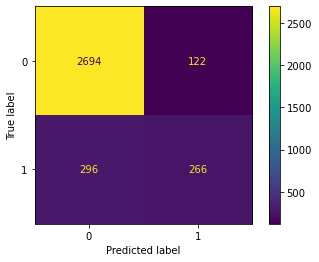

In [184]:
plot_confusion_matrix(KNN_model,X_tests,y_tests);

In [185]:
print(classification_report(y_tests, ytest_predict_knn))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2816
           1       0.69      0.47      0.56       562

    accuracy                           0.88      3378
   macro avg       0.79      0.71      0.74      3378
weighted avg       0.87      0.88      0.87      3378



In [186]:
knn_metrics_tests=classification_report(y_tests, ytest_predict_knn,output_dict=True)
df90=pd.DataFrame(knn_metrics_tests).transpose()
activecustomers_precision_tests_knn=round(df90.loc["0"][0],2)
activecustomers_recall_tests_knn=round(df90.loc["0"][1],2)
activecustomers_f1_tests_knn=round(df90.loc["0"][2],2)
churncustomer_precision_tests_knn=round(df90.loc["1"][0],2)
churncustomer_recall_tests_knn=round(df90.loc["1"][1],2)
churncustomer_f1_tests_knn=round(df90.loc["1"][2],2)
print ('activecustomers_tests_precision ',activecustomers_precision_tests_knn)
print ('activecustomers_tests_recall ',activecustomers_recall_tests_knn)
print ('activecustomers_tests_f1 ',activecustomers_f1_tests_knn)
print ('churncustomer_tests_precision ',churncustomer_precision_tests_knn)
print ('churncustomer_tests_recall ',churncustomer_recall_tests_knn)
print ('churncustomer_tests_f1 ',churncustomer_f1_tests_knn)

activecustomers_tests_precision  0.9
activecustomers_tests_recall  0.96
activecustomers_tests_f1  0.93
churncustomer_tests_precision  0.69
churncustomer_tests_recall  0.47
churncustomer_tests_f1  0.56


### Default value n_neighbors=5, lets check the performance for K=7



In [187]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_trains,y_trains)

KNeighborsClassifier(n_neighbors=7)

In [188]:
## Performance Matrix on trains data set
y_trains_predict = KNN_model.predict(X_trains)
model_score = KNN_model.score(X_trains, y_trains)
print(model_score)
print(metrics.confusion_matrix(y_trains, y_trains_predict))
print(metrics.classification_report(y_trains, y_trains_predict))

0.9076376554174067
[[6388  160]
 [ 568  766]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6548
           1       0.83      0.57      0.68      1334

    accuracy                           0.91      7882
   macro avg       0.87      0.77      0.81      7882
weighted avg       0.90      0.91      0.90      7882



In [189]:
## Performance Matrix on tests data set
y_tests_predict = KNN_model.predict(X_tests)
model_score = KNN_model.score(X_tests, y_tests)
print(model_score)
print(metrics.confusion_matrix(y_tests, y_tests_predict))
print(metrics.classification_report(y_tests, y_tests_predict))

0.8691533451746596
[[2703  113]
 [ 329  233]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2816
           1       0.67      0.41      0.51       562

    accuracy                           0.87      3378
   macro avg       0.78      0.69      0.72      3378
weighted avg       0.86      0.87      0.86      3378



**Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error

Hint: Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE**

In [190]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,15,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_trains, y_trains)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.028419182948490218,
 0.06571936056838368,
 0.0885139135583185,
 0.1042036708111308,
 0.11190053285968027,
 0.11663706335109536,
 0.12255772646536411]

#### Plot misclassification error vs k (with k value on X-axis) using matplotli

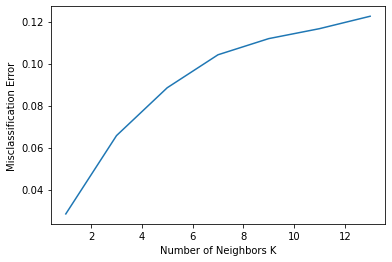

In [191]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,15,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#00b3e5;">3.6. Naives Bayes

In [192]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

#### Predicting on train and test datasets


In [193]:
ytrain_predict_nb = NB_model.predict(X_train)
ytest_predict_nb = NB_model.predict(X_test)

### Getting predicted classes and probabilities

In [194]:
ytest_predict_nb_prob = NB_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_nb_prob).head()

,0,1
0,0.31589,0.68411
1,0.34603,0.65397
2,0.89035,0.10965
3,0.60366,0.39634
4,0.98377,0.01623


### Accuracy on training set

In [195]:
# Accuracy - Train Data
nb_train_acc = NB_model.score(X_train, y_train)
nb_train_acc

0.8730017761989343

### Accuracy on test set


In [196]:
# Accuracy - Test Data
nb_test_acc = NB_model.score(X_test, y_test)
nb_test_acc

0.8688573120189461

### AUC and ROC for the training data


AUC: 0.830


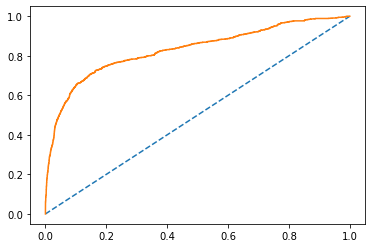

In [197]:
# predict probabilities
probs_nb_train = NB_model.predict_proba(X_train)
# keep probabilities for active customers
probs_nb_train_activecustomers = probs_nb_train[:, 1]
# calculate AUC
auc_nb_train = roc_auc_score(y_train, probs_nb_train_activecustomers)
print('AUC: %.3f' % auc_nb_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_nb_train_activecustomers)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

### AUC and ROC for the test data

AUC: 0.826


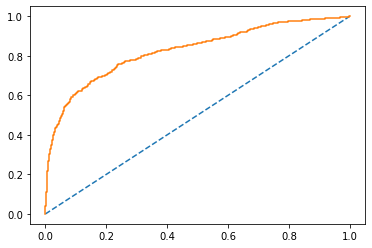

In [198]:
# predict probabilities
probs_nb_test = NB_model.predict_proba(X_test)

probs_nb_test = probs_nb_test[:, 1]
# calculate AUC
auc_nb_test = roc_auc_score(y_test, probs_nb_test)
print('AUC: %.3f' % auc_nb_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_nb_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

### Confusion matrix for training data

In [199]:
confusion_matrix(y_train, ytrain_predict_nb)

array([[6138,  418],
       [ 583,  743]], dtype=int64)

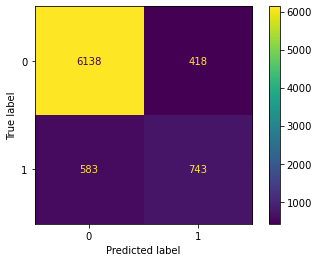

In [200]:
plot_confusion_matrix(NB_model,X_train,y_train);

In [201]:
print(classification_report(y_train, ytrain_predict_nb))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      6556
           1       0.64      0.56      0.60      1326

    accuracy                           0.87      7882
   macro avg       0.78      0.75      0.76      7882
weighted avg       0.87      0.87      0.87      7882



In [202]:
nb_metrics_train=classification_report(y_train, ytrain_predict_nb,output_dict=True)
df89=pd.DataFrame(nb_metrics_train).transpose()
activecustomers_precision_train_nb=round(df89.loc["0"][0],2)
activecustomers_recall_train_nb=round(df89.loc["0"][1],2)
activecustomers_f1_train_nb=round(df89.loc["0"][2],2)
churncustomer_precision_train_nb=round(df89.loc["1"][0],2)
churncustomer_recall_train_nb=round(df89.loc["1"][1],2)
churncustomer_f1_train_nb=round(df89.loc["1"][2],2)
print ('activecustomers_train_precision ',activecustomers_precision_train_nb)
print ('activecustomers_train_recall ',activecustomers_recall_train_nb)
print ('activecustomers_train_f1 ',activecustomers_f1_train_nb)
print ('churncustomer_train_precision ',churncustomer_precision_train_nb)
print ('churncustomer_train_recall ',churncustomer_recall_train_nb)
print ('churncustomer_train_f1 ',churncustomer_f1_train_nb)

activecustomers_train_precision  0.91
activecustomers_train_recall  0.94
activecustomers_train_f1  0.92
churncustomer_train_precision  0.64
churncustomer_train_recall  0.56
churncustomer_train_f1  0.6


### Confusion matrix for test data


In [203]:
confusion_matrix(y_test, ytest_predict_nb)

array([[2626,  182],
       [ 261,  309]], dtype=int64)

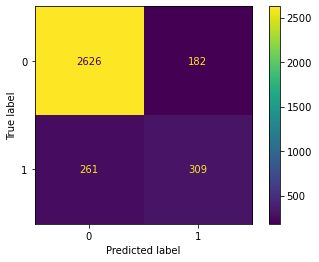

In [204]:
plot_confusion_matrix(NB_model,X_test,y_test);

In [205]:
print(classification_report(y_test, ytest_predict_nb))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2808
           1       0.63      0.54      0.58       570

    accuracy                           0.87      3378
   macro avg       0.77      0.74      0.75      3378
weighted avg       0.86      0.87      0.86      3378



In [206]:
nb_metrics_test=classification_report(y_test, ytest_predict_nb,output_dict=True)
df88=pd.DataFrame(nb_metrics_test).transpose()
activecustomers_precision_test_nb=round(df88.loc["0"][0],2)
activecustomers_recall_test_nb=round(df88.loc["0"][1],2)
activecustomers_f1_test_nb=round(df88.loc["0"][2],2)
churncustomer_precision_test_nb=round(df88.loc["1"][0],2)
churncustomer_recall_test_nb=round(df88.loc["1"][1],2)
churncustomer_f1_test_nb=round(df88.loc["1"][2],2)
print ('activecustomers_test_precision ',activecustomers_precision_test_nb)
print ('activecustomers_test_recall ',activecustomers_recall_test_nb)
print ('activecustomers_test_f1 ',activecustomers_f1_test_nb)
print ('churncustomer_test_precision ',churncustomer_precision_test_nb)
print ('churncustomer_test_recall ',churncustomer_recall_test_nb)
print ('churncustomer_test_f1 ',churncustomer_f1_test_nb)

activecustomers_test_precision  0.91
activecustomers_test_recall  0.94
activecustomers_test_f1  0.92
churncustomer_test_precision  0.63
churncustomer_test_recall  0.54
churncustomer_test_f1  0.58


<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#00b3e5;">3.7. Bagging

In [207]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100,random_state=1)
Bagging_model = BaggingClassifier(base_estimator=RF_model, n_estimators=100, random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=100, random_state=1)

#### Predicting on train and test datasets


In [208]:
ytrain_predict_bag = Bagging_model.predict(X_train)
ytest_predict_bag = Bagging_model.predict(X_test)

### Getting predicted classes and probabilities


In [209]:
ytest_predict_rf_prob = Bagging_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_rf_prob).head()

,0,1
0,0.51000,0.49000
1,0.18140,0.81860
2,0.98290,0.01710
3,0.78680,0.21320
4,0.99580,0.00420


#### Accuracy on training set

In [210]:
# Accuracy - Train Data
bag_train_acc = Bagging_model.score(X_train, y_train)
bag_train_acc

0.9960669880740929

#### Accuracy on test set

In [211]:
# Accuracy - Test Data
bag_test_acc = Bagging_model.score(X_test, y_test)
bag_test_acc

0.9573712255772646

In [212]:
#### AUC and ROC for the training data

AUC: 1.000


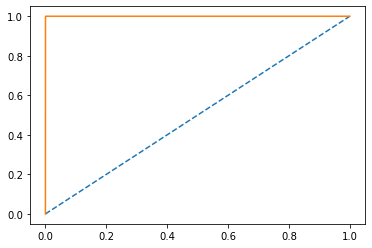

In [213]:
# predict probabilities
probs_bag_train = Bagging_model.predict_proba(X_train)
# keep probabilities foractive customers
probs_bag_train_activecustomers = probs_bag_train[:, 1]
# calculate AUC
auc_bag_train = roc_auc_score(y_train, probs_bag_train_activecustomers)
print('AUC: %.3f' % auc_bag_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_bag_train_activecustomers)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

#### AUC and ROC for the test data

AUC: 0.988


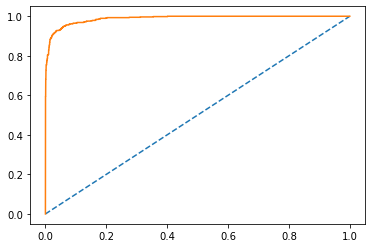

In [214]:
# predict probabilities
probs_bag_test = Bagging_model.predict_proba(X_test)
probs_bag_test = probs_bag_test[:, 1]
# calculate AUC
auc_bag_test = roc_auc_score(y_test, probs_bag_test)
print('AUC: %.3f' % auc_bag_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_bag_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

#### Confusion matrix for train data


In [215]:
confusion_matrix(y_train, ytrain_predict_rf)

array([[6456,  100],
       [ 618,  708]], dtype=int64)

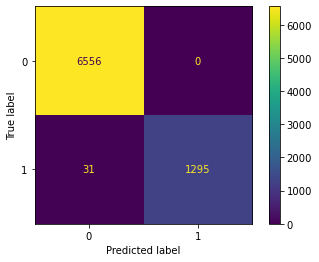

In [216]:
plot_confusion_matrix(Bagging_model,X_train,y_train);

In [217]:
print(classification_report(y_train, ytrain_predict_bag))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      0.98      0.99      1326

    accuracy                           1.00      7882
   macro avg       1.00      0.99      0.99      7882
weighted avg       1.00      1.00      1.00      7882



In [218]:
bag_metrics_train=classification_report(y_train, ytrain_predict_bag,output_dict=True)
df87=pd.DataFrame(bag_metrics_train).transpose()
activecustomers_precision_train_bag=round(df87.loc["0"][0],2)
activecustomers_recall_train_bag=round(df87.loc["0"][1],2)
activecustomers_f1_train_bag=round(df87.loc["0"][2],2)
churncustomer_precision_train_bag=round(df87.loc["1"][0],2)
churncustomer_recall_train_bag=round(df87.loc["1"][1],2)
churncustomer_f1_train_bag=round(df87.loc["1"][2],2)
print ('activecustomers_train_precision ',activecustomers_precision_train_bag)
print ('activecustomers_train_recall ',activecustomers_recall_train_bag)
print ('activecustomers_train_f1 ',activecustomers_f1_train_bag)
print ('churncustomer_train_precision ',churncustomer_precision_train_bag)
print ('churncustomer_train_recall ',churncustomer_recall_train_bag)
print ('churncustomer_train_f1 ',churncustomer_f1_train_bag)

activecustomers_train_precision  1.0
activecustomers_train_recall  1.0
activecustomers_train_f1  1.0
churncustomer_train_precision  1.0
churncustomer_train_recall  0.98
churncustomer_train_f1  0.99


#### Confusion matrix for test data


In [219]:
confusion_matrix(y_test, ytest_predict_bag)

array([[2795,   13],
       [ 131,  439]], dtype=int64)

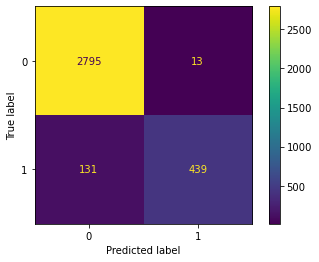

In [220]:
plot_confusion_matrix(Bagging_model,X_test,y_test);

In [221]:
print(classification_report(y_test, ytest_predict_bag))

              precision    recall  f1-score   support

           0       0.96      1.00      0.97      2808
           1       0.97      0.77      0.86       570

    accuracy                           0.96      3378
   macro avg       0.96      0.88      0.92      3378
weighted avg       0.96      0.96      0.96      3378



In [222]:
bag_metrics_test=classification_report(y_test, ytest_predict_bag,output_dict=True)
df86=pd.DataFrame(bag_metrics_test).transpose()
activecustomers_precision_test_bag=round(df86.loc["0"][0],2)
activecustomers_recall_test_bag=round(df86.loc["0"][1],2)
activecustomers_f1_test_bag=round(df86.loc["0"][2],2)
churncustomer_precision_test_bag=round(df86.loc["1"][0],2)
churncustomer_recall_test_bag=round(df86.loc["1"][1],2)
churncustomer_f1_test_bag=round(df86.loc["1"][2],2)
print ('activecustomers_test_precision ',activecustomers_precision_test_bag)
print ('activecustomers_test_recall ',activecustomers_recall_test_bag)
print ('activecustomers_test_f1 ',activecustomers_f1_test_bag)
print ('churncustomer_test_precision ',churncustomer_precision_test_bag)
print ('churncustomer_test_recall ',churncustomer_recall_test_bag)
print ('churncustomer_test_f1 ',churncustomer_f1_test_bag)

activecustomers_test_precision  0.96
activecustomers_test_recall  1.0
activecustomers_test_f1  0.97
churncustomer_test_precision  0.97
churncustomer_test_recall  0.77
churncustomer_test_f1  0.86


<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#00b3e5;">3.8. SVM

In [223]:
X_trains,X_tests,y_trains,y_tests=train_test_split(X, y, test_size = 0.30, random_state = 123)

In [224]:
sc=StandardScaler()
X_trains=sc.fit_transform(X_trains)
X_tests=sc.transform(X_tests)

In [225]:
from sklearn import svm

SVM_model = svm.SVC(random_state=1)
SVM_model.fit(X_trains, y_trains)

SVC(random_state=1)

#### Predicting on train and test datasets

In [226]:
ytrain_predict_svm = SVM_model.predict(X_trains)
ytest_predict_svm = SVM_model.predict(X_tests)

#### Getting predicted classes and probabilities

In [227]:
ytest_predict_svm = SVM_model.predict(X_tests)
pd.DataFrame(ytest_predict_svm).head()

,0
0,0
1,0
2,1
3,1
4,0


#### Accuracy on training set

In [228]:
# Accuracy - Train Data
svm_train_acc = SVM_model.score(X_trains, y_trains)
svm_train_acc

0.9437959908652627

#### Accuracy on test set

In [229]:
# Accuracy - Test Data
svm_test_acc = SVM_model.score(X_tests, y_tests)
svm_test_acc

0.9277679100059206

#### Confusion matrix for training data

In [230]:
confusion_matrix(y_trains, ytrain_predict_svm)

array([[6499,   49],
       [ 394,  940]], dtype=int64)

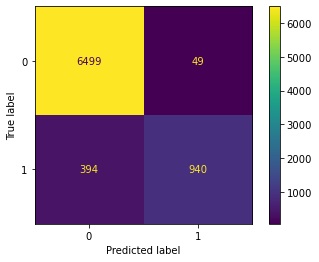

In [231]:
plot_confusion_matrix(SVM_model,X_trains,y_trains);

In [232]:
print(classification_report(y_trains, ytrain_predict_svm))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      6548
           1       0.95      0.70      0.81      1334

    accuracy                           0.94      7882
   macro avg       0.95      0.85      0.89      7882
weighted avg       0.94      0.94      0.94      7882



In [233]:
svm_metrics_train=classification_report(y_trains, ytrain_predict_svm,output_dict=True)
df85=pd.DataFrame(svm_metrics_train).transpose()
activecustomers_precision_train_svm=round(df85.loc["0"][0],2)
activecustomers_recall_train_svm=round(df85.loc["0"][1],2)
activecustomers_f1_train_svm=round(df85.loc["0"][2],2)
churncustomer_precision_train_svm=round(df85.loc["1"][0],2)
churncustomer_recall_train_svm=round(df85.loc["1"][1],2)
churncustomer_f1_train_svm=round(df85.loc["1"][2],2)
print ('activecustomers_train_precision ',activecustomers_precision_train_svm)
print ('activecustomers_train_recall ',activecustomers_recall_train_svm)
print ('activecustomers_train_f1 ',activecustomers_f1_train_svm)
print ('churncustomer_train_precision ',churncustomer_precision_train_svm)
print ('churncustomer_train_recall ',churncustomer_recall_train_svm)
print ('churncustomer_train_f1 ',churncustomer_f1_train_svm)

activecustomers_train_precision  0.94
activecustomers_train_recall  0.99
activecustomers_train_f1  0.97
churncustomer_train_precision  0.95
churncustomer_train_recall  0.7
churncustomer_train_f1  0.81


#### Confusion matrix for test data

In [234]:
confusion_matrix(y_tests, ytest_predict_svm)

array([[2783,   33],
       [ 211,  351]], dtype=int64)

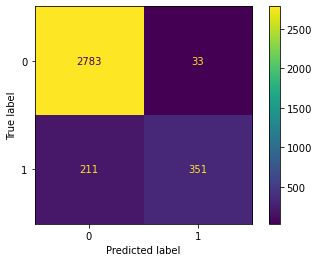

In [235]:
plot_confusion_matrix(SVM_model,X_tests,y_tests);

In [236]:
print(classification_report(y_tests, ytest_predict_svm))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2816
           1       0.91      0.62      0.74       562

    accuracy                           0.93      3378
   macro avg       0.92      0.81      0.85      3378
weighted avg       0.93      0.93      0.92      3378



In [237]:
svm_metrics_test=classification_report(y_tests, ytest_predict_svm,output_dict=True)
df84=pd.DataFrame(logistic_metrics).transpose()
activecustomers_precision_test_svm=round(df84.loc["1"][0],2)
activecustomers_recall_test_svm=round(df84.loc["1"][1],2)
activecustomers_f1_test_svm=round(df84.loc["1"][2],2)
churncustomer_precision_test_svm=round(df84.loc["0"][0],2)
churncustomer_recall_test_svm=round(df84.loc["0"][1],2)
churncustomer_f1_test_svm=round(df84.loc["0"][2],2)
print ('activecustomers_test_precision ',activecustomers_precision_test_svm)
print ('activecustomers_test_recall ',activecustomers_recall_test_svm)
print ('activecustomers_test_f1 ',activecustomers_f1_test_svm)
print ('churncustomer_test_precision ',churncustomer_precision_test_svm)
print ('churncustomer_test_recall ',churncustomer_recall_test_svm)
print ('churncustomer_test_f1 ',churncustomer_f1_test_svm)

activecustomers_test_precision  0.74
activecustomers_test_recall  0.46
activecustomers_test_f1  0.57
churncustomer_test_precision  0.9
churncustomer_test_recall  0.97
churncustomer_test_f1  0.93


<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#00b3e5;">3.9. Decision Tree (CART)

In [238]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve


In [239]:
dtc=DecisionTreeClassifier(random_state=123)



In [240]:
dtc.fit(X_train,y_train)


DecisionTreeClassifier(random_state=123)

### Predictions on The training Set



In [241]:
prediction_dtc=dtc.predict(X_train)


### Check the Metrics for Predictions on the Training set


Accuracy for DecisionTreeClassifier model is 
 1.0


Classification report for DecisionTreeClassifier model is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



Confusion Matrix for DecisionTreeClassifier model is


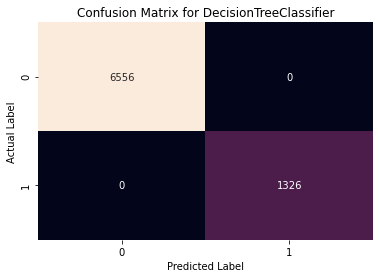

In [242]:
models_names={dtc:'DecisionTreeClassifier'}

print('Accuracy for {} model is'.format(models_names[dtc]),'\n',accuracy_score(y_train,prediction_dtc))
print('\n')
print('Classification report for {} model is'.format(models_names[dtc]),'\n',classification_report(y_train,prediction_dtc))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[dtc]))
sns.heatmap(confusion_matrix(y_train,prediction_dtc),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[dtc]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

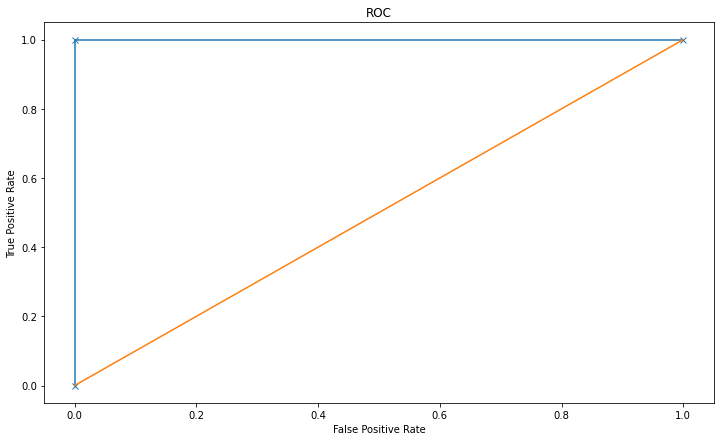

Area under Curve is 1.0


In [243]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,dtc.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='CART')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,dtc.predict_proba(X_train)[:,1]))

<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#00b3e5;">3.9. MLP Classifier (Artificial Neural Network)

In [244]:
X_trains,X_tests,y_trains,y_tests=train_test_split(X, y, test_size = 0.30, random_state = 123)

In [245]:
sc=StandardScaler()

In [246]:
X_trains=sc.fit_transform(X_trains)
X_tests=sc.transform(X_tests)

In [247]:
mlp=MLPClassifier(hidden_layer_sizes=(500),solver='sgd',random_state=0,max_iter=500)


In [248]:
mlp.fit(X_trains,y_trains)


MLPClassifier(hidden_layer_sizes=500, max_iter=500, random_state=0,
              solver='sgd')

### Predictions on The training Set



In [249]:
prediction_ann=mlp.predict(X_trains)


### Check the Metrics for Predictions on the Training set



Accuracy for ANN model is 
 0.9179142349657448


Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      6548
           1       0.84      0.63      0.72      1334

    accuracy                           0.92      7882
   macro avg       0.89      0.80      0.84      7882
weighted avg       0.91      0.92      0.91      7882



Confusion Matrix for ANN model is


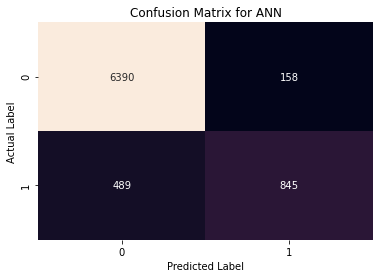

In [250]:
models_names={dtc:'DecisionTreeClassifier',mlp:'ANN'}

print('Accuracy for {} model is'.format(models_names[mlp]),'\n',accuracy_score(y_trains,prediction_ann))
print('\n')
print('Classification report for {} model is'.format(models_names[mlp]),'\n',classification_report(y_trains,prediction_ann))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[mlp]))
sns.heatmap(confusion_matrix(y_trains,prediction_ann),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[mlp]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

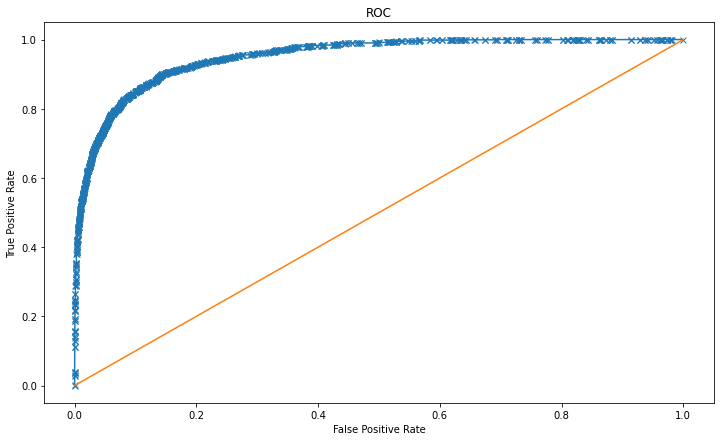

Area under Curve is 0.950115809535672


In [251]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_trains,mlp.predict_proba(X_trains)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='ANN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_trains,mlp.predict_proba(X_trains)[:,1]))

<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#00b3e5;">3.10. ANN & CART on Test

In [252]:
models=[dtc,mlp]
models_names={dtc:'DecisionTreeClassifier',mlp:'ANN'}

Accuracy for DecisionTreeClassifier model is 
 0.9378330373001776


Classification report for DecisionTreeClassifier model is 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2816
           1       0.81      0.82      0.81       562

    accuracy                           0.94      3378
   macro avg       0.89      0.89      0.89      3378
weighted avg       0.94      0.94      0.94      3378



Confusion Matrix for DecisionTreeClassifier model is


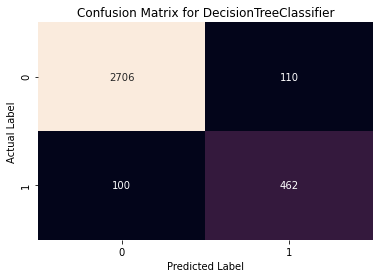

Accuracy for ANN model is 
 0.9076376554174067


Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      2816
           1       0.79      0.60      0.68       562

    accuracy                           0.91      3378
   macro avg       0.86      0.79      0.82      3378
weighted avg       0.90      0.91      0.90      3378



Confusion Matrix for ANN model is


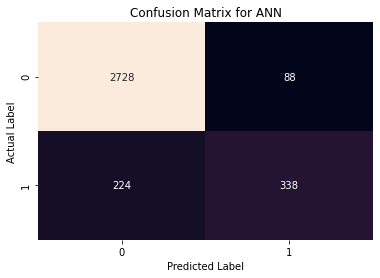

In [253]:
for i in models:
    i.fit(X_trains,y_trains)
    print('Accuracy for {} model is'.format(models_names[i]),'\n',accuracy_score(y_tests,i.predict(X_tests)))
    print('\n')
    print('Classification report for {} model is'.format(models_names[i]),'\n',classification_report(y_tests,i.predict(X_tests)))
    print('\n')
    print('Confusion Matrix for {} model is'.format(models_names[i]))
    sns.heatmap(confusion_matrix(y_tests,i.predict(X_tests)),annot=True,fmt='d',cbar=False)
    plt.title('Confusion Matrix for {}'.format(models_names[i]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

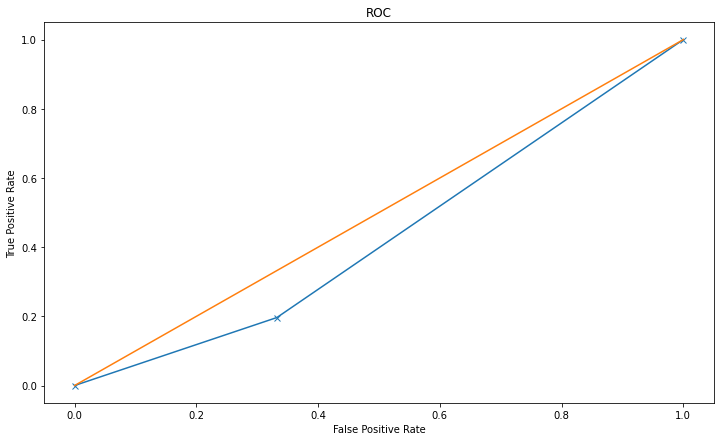

Area under Curve is 0.4321131354026091


In [254]:
## CART

from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,dtc.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='CART')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,dtc.predict_proba(X_test)[:,1]))

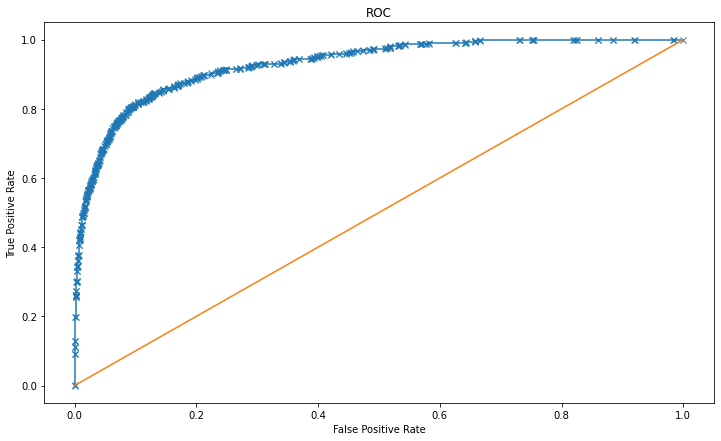

Area under Curve is 0.9291706264153996


In [255]:
## ANN

from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_tests,mlp.predict_proba(X_tests)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='ANN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_tests,mlp.predict_proba(X_tests)[:,1]))

Area under the curve for Decision Tree Classification Model is 0.8915007784697508
Area under the curve for Artificial Neural Network Model is 0.9291706264153996


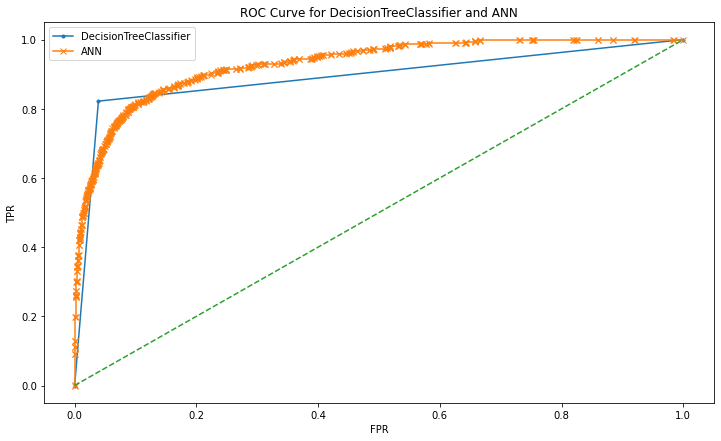

In [256]:
print('Area under the curve for Decision Tree Classification Model is',roc_auc_score(y_tests,dtc.predict_proba(X_tests)[:,1]))
print('Area under the curve for Artificial Neural Network Model is',roc_auc_score(y_tests,mlp.predict_proba(X_tests)[:,1]))

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_tests, dtc.predict_proba(X_tests)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_ann, tpr_ann, thresholds = roc_curve(y_tests, mlp.predict_proba(X_tests)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('DecisionTreeClassifier and ANN'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

In [257]:
#Model comparisons

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LogisticReg Train':[logistic_train_acc,auc_lr_train,churncustomer_recall_train_lr,churncustomer_precision_train_lr,churncustomer_f1_train_lr],
        'LogisticReg Test':[logistic_test_acc,auc_lr_test,churncustomer_recall_test_lr,churncustomer_precision_test_lr,activecustomer_f1_test_lr],
       
                     
        'KNN Train':[knn_train_acc,auc_knn_trains,churncustomer_recall_trains_knn,churncustomer_precision_trains_knn,churncustomer_f1_trains_knn],
        'KNN Test':[knn_test_acc,auc_knn_tests,churncustomer_recall_tests_knn,churncustomer_precision_tests_knn,churncustomer_f1_tests_knn],
         
          'NB Train':[nb_train_acc,auc_nb_train,churncustomer_recall_train_nb,churncustomer_precision_train_nb,churncustomer_f1_train_nb],
        'NB Test':[nb_test_acc,auc_nb_test,churncustomer_recall_test_nb,churncustomer_precision_test_nb,churncustomer_f1_test_nb],           
                     
                     
        'Bagging Train':[bag_train_acc,auc_bag_train,churncustomer_recall_train_bag,churncustomer_precision_train_bag,churncustomer_f1_train_bag],
        'Bagging Test':[bag_test_acc,auc_bag_test,churncustomer_recall_test_bag,churncustomer_precision_test_bag,churncustomer_f1_test_bag],
                    
      
        'LDA Train':[lda_train_acc,auc_lda_train,churncustomer_recall_train_lda,churncustomer_precision_train_lda,churncustomer_f1_train_lda],
        'LDA Test':[lda_test_acc,auc_lda_test,churncustomer_recall_test_lda,churncustomer_precision_test_lda,churncustomer_f1_test_lda],
       'Boosting Train':[xgb_train_acc,auc_xgb_train,churncustomer_recall_train_xgb,churncustomer_precision_train_xgb,churncustomer_f1_train_xgb],
        'Boosting Test':[xgb_test_acc,auc_xgb_test,churncustomer_recall_test_xgb,churncustomer_precision_test_xgb,churncustomer_f1_test_xgb]},index=index)
round(data,2)

,LogisticReg Train,LogisticReg Test,KNN Train,KNN Test,NB Train,NB Test,Bagging Train,Bagging Test,LDA Train,LDA Test,Boosting Train,Boosting Test
Accuracy,0.88000,0.88000,0.92000,0.88000,0.87000,0.87000,1.00000,0.96000,0.88000,0.88000,0.93000,0.91000
AUC,0.87000,0.87000,0.97000,0.87000,0.83000,0.83000,1.00000,0.99000,0.86000,0.86000,0.95000,0.92000
Recall,0.45000,0.46000,0.68000,0.47000,0.56000,0.54000,0.98000,0.77000,0.40000,0.41000,0.69000,0.63000
Precision,0.74000,0.74000,0.85000,0.69000,0.64000,0.63000,1.00000,0.97000,0.74000,0.77000,0.85000,0.82000
F1 Score,0.56000,0.93000,0.75000,0.56000,0.60000,0.58000,0.99000,0.86000,0.52000,0.54000,0.76000,0.71000


In [258]:
#Model comparisons Class 0

In [259]:
#index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
#data = pd.DataFrame({'LogisticReg Train':[logistic_train_acc,auc_lr_train,activecustomers_recall_train_lr,activecustomers_precision_train_lr,activecustomers_f1_train_lr],
       # 'LogisticReg Test':[logistic_test_acc,auc_lr_test,activecustomer_recall_test_lr,activecustomer_precision_test_lr,activecustomer_f1_test_lr],
       
                     
     #   'KNN Train':[knn_train_acc,auc_knn_trains,activecustomer_recall_train_knn,activecustomer_precision_train_knn,activecustomer_f1_train_knn],
     #   'KNN Test':[knn_test_acc,auc_knn_test,activecustomer_recall_test_knn,activecustomer_precision_test_knn,activecustomer_f1_test_knn],
         
     #     'NB Train':[nb_train_acc,auc_nb_train,activecustomers_recall_train_nb,activecustomers_precision_train_nb,activecustomers_f1_train_nb],
   #     'NB Test':[nb_test_acc,auc_nb_test,activecustomers_recall_test_nb,activecustomers_precision_test_nb,activecustomers_f1_test_nb],           
                     
                     
     #   'Bagging Train':[bag_train_acc,auc_bag_train,activecustomers_recall_train_bag,activecustomers_precision_train_bag,activecustomers_f1_train_bag],
        #'Bagging Test':[bag_test_acc,auc_bag_test,activecustomers_recall_test_bag,activecustomers_precision_test_bag,activecustomers_f1_test_bag],
                    
      
       # 'LDA Train':[lda_train_acc,auc_lda_train,activecustomers_recall_train_lda,activecustomers_precision_train_lda,activecustomers_f1_train_lda],
       # 'LDA Test':[lda_test_acc,auc_lda_test,activecustomers_recall_test_lda,activecustomers_precision_test_lda,activecustomers_f1_test_lda],
      # 'Boosting Train':[xgb_train_acc,auc_xgb_train,activecustomer_recall_train_xgb,activecustomer_precision_train_xgb,activecustomer_f1_train_xgb],
      #  'Boosting Test':[xgb_test_acc,auc_xgb_test,activecustomer_recall_test_xgb,activecustomer_precision_test_xgb,activecustomer_f1_test_xgb]},index=index)#
#round(data,2)#

<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#00b3e5;">3.2. MODEL TUNING

#### Logistic Regression Model

In [260]:
from sklearn.model_selection import GridSearchCV

In [261]:
param_grid_lr = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50,75,100,200,300],
    'tol': [0.01, 0.001, 0.001]    
}

lr22 = LogisticRegression(random_state=1)

grid_search_lr = GridSearchCV(lr22, param_grid = param_grid_lr, cv = 10)

In [262]:
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=1),
             param_grid={'max_iter': [50, 75, 100, 200, 300],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.01, 0.001, 0.001]})

In [263]:
grid_search_lr.best_params_

{'max_iter': 50, 'solver': 'newton-cg', 'tol': 0.01}

In [264]:
best_grid_lr = grid_search_lr.best_estimator_

In [265]:
### Predicting on train and test

ytrain_predict_lr_tune = best_grid_lr.predict(X_train)
ytest_predict_lr_tune = best_grid_lr.predict(X_test)

In [266]:
### Getting predicted classes and probabilities

ytest_predict_lr_tune_prob = best_grid_lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_lr_tune_prob).head()

,0,1
0,0.54391,0.45609
1,0.38696,0.61304
2,0.93786,0.06214
3,0.73294,0.26706
4,0.98490,0.01510


In [267]:
## Accuracy on training set

logistic_train_acc_tune = best_grid_lr.score(X_train, y_train)
logistic_train_acc_tune

0.8834052270997209

In [268]:
### Accuracy on test set

logistic_test_acc_tune = best_grid_lr.score(X_test, y_test)
logistic_test_acc_tune

0.8866193013617525

AUC: 0.869


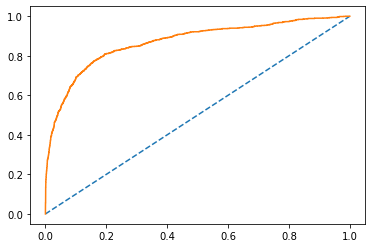

In [269]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

# predict probabilities
probs_lr_train = best_grid_lr.predict_proba(X_train)
# keep probabilities for active customers only
probs_lr_train_active = probs_lr_train[:, 1]
# calculate AUC
auc_lr_train = roc_auc_score(y_train, probs_lr_train_active)
print('AUC: %.3f' % auc_lr_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_lr_train_active)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

### AUC and ROC for the test data - LR

AUC: 0.871


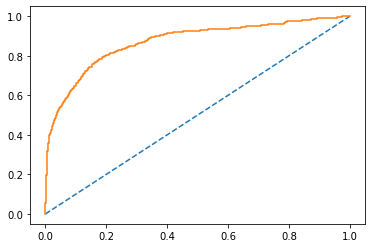

In [270]:
# predict probabilities
probs_lr_test = best_grid_lr.predict_proba(X_test)
# keep probabilities for active customer only
probs_lr_test = probs_lr_test[:, 1]
# calculate AUC
auc_lr_test = roc_auc_score(y_test, probs_lr_test)
print('AUC: %.3f' % auc_lr_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_lr_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [271]:
print(classification_report(y_train, ytrain_predict_lr_tune))  #TRAIN DATA

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6556
           1       0.76      0.45      0.56      1326

    accuracy                           0.88      7882
   macro avg       0.83      0.71      0.75      7882
weighted avg       0.87      0.88      0.87      7882



In [272]:
print(classification_report(y_test, ytest_predict_lr_tune)) #TEST DATA

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2808
           1       0.78      0.46      0.58       570

    accuracy                           0.89      3378
   macro avg       0.84      0.72      0.76      3378
weighted avg       0.88      0.89      0.87      3378



#### KNN MODEL

In [273]:
sc=StandardScaler()
X_trains=sc.fit_transform(X_trains)
X_tests=sc.transform(X_tests)

In [274]:
param_grid_knn = {
    'n_neighbors': [2,3,4,5,6],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan']    
}

knn22 = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn22, param_grid_knn, cv = 10)

In [275]:
model_knn_tune = grid_search_knn.fit(X_trains, y_trains)

In [276]:
model_knn_tune.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 2,
 'weights': 'distance'}

In [277]:
best_grid_knn = model_knn_tune.best_estimator_

In [278]:
### Predicting on train and test

ytrain_predict_knn_tune = best_grid_knn.predict(X_trains)
ytest_predict_knn_tune = best_grid_knn.predict(X_tests)

In [279]:
### Getting predicted classes and probabilities

ytest_predict_knn_tune_prob = best_grid_knn.predict_proba(X_tests)
pd.DataFrame(ytest_predict_knn_tune_prob).head()

,0,1
0,1.00000,0.00000
1,1.00000,0.00000
2,0.00000,1.00000
3,0.00000,1.00000
4,1.00000,0.00000


In [280]:
## Accuracy on training set

knn_train_acc_tune = best_grid_knn.score(X_trains, y_trains)
knn_train_acc_tune

1.0

In [281]:
### Accuracy on test set

knn_test_acc_tune = best_grid_knn.score(X_tests, y_tests)
knn_test_acc_tune

0.9887507400828893

### AUC and ROC for the training data


AUC: 1.000


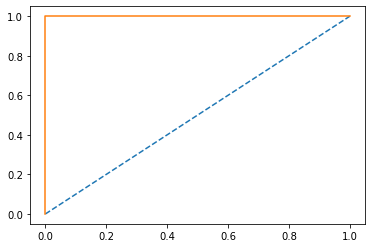

In [282]:
# predict probabilities
probs_knn_train = best_grid_knn.predict_proba(X_trains)
# keep probabilities for active customers
probs_knn_train_activecustomers = probs_knn_train[:, 1]
# calculate AUC
auc_knn_train = roc_auc_score(y_trains, probs_knn_train_activecustomers)
print('AUC: %.3f' % auc_knn_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_trains, probs_knn_train_activecustomers)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

### AUC and ROC for the test data


AUC: 0.989


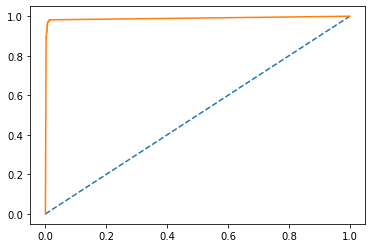

In [283]:
# predict probabilities
probs_knn_test = best_grid_knn.predict_proba(X_tests)
# keep probabilities for Labour party only
probs_knn_test = probs_knn_test[:, 1]
# calculate AUC
auc_knn_test = roc_auc_score(y_tests, probs_knn_test)
print('AUC: %.3f' % auc_knn_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_tests, probs_knn_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [284]:
print(classification_report(y_trains, ytrain_predict_knn_tune))  #TRAIN DATA

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6548
           1       1.00      1.00      1.00      1334

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [285]:
print(classification_report(y_tests, ytest_predict_knn_tune))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2816
           1       0.96      0.97      0.97       562

    accuracy                           0.99      3378
   macro avg       0.98      0.98      0.98      3378
weighted avg       0.99      0.99      0.99      3378



### Random Forest

### With GridSearchCV

In [286]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [287]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [288]:
rf_Model = RandomForestClassifier()

In [289]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [290]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=2)

In [291]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 20}

In [292]:
ytrain_predict_rf_tune = rf_Grid.predict(X_train)
ytest_predict_rf_tune = rf_Grid.predict(X_test)

In [293]:
# Accuracy - Training Data

rf_Grid.score(X_train,y_train)

0.8741436183709719

In [294]:
# Accuracy - Test Data

rf_Grid.score(X_test, y_test)

0.874185908821788

In [295]:
print(classification_report(y_train, ytrain_predict_rf_tune)) #TRAIN DATA 

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      6556
           1       0.87      0.30      0.44      1326

    accuracy                           0.87      7882
   macro avg       0.87      0.64      0.69      7882
weighted avg       0.87      0.87      0.85      7882



In [296]:
print(classification_report(y_test, ytest_predict_rf_tune)) #TRAIN DATA

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2808
           1       0.86      0.30      0.45       570

    accuracy                           0.87      3378
   macro avg       0.87      0.65      0.69      3378
weighted avg       0.87      0.87      0.85      3378



In [297]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.874
Test Accuracy - : 0.874


## ANN

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [100,200,300,500],
    'max_iter': [5000,2500,7000,6000],
    'solver': ['sgd','adam'],
    'tol': [0.01],
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [299]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [100, 200, 300, 500],
                         'max_iter': [5000, 2500, 7000, 6000],
                         'solver': ['sgd', 'adam'], 'tol': [0.01]})

In [300]:
best_grid = grid_search.best_estimator_

In [301]:
best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=1, tol=0.01)

In [302]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [303]:
confusion_matrix(y_train,ytrain_predict)

array([[6409,  147],
       [ 766,  560]], dtype=int64)

In [304]:
mlp.score(X_train,y_train)

0.8317685866531337

## ANN Tune -  Train DAta

In [305]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6556
           1       0.79      0.42      0.55      1326

    accuracy                           0.88      7882
   macro avg       0.84      0.70      0.74      7882
weighted avg       0.88      0.88      0.87      7882



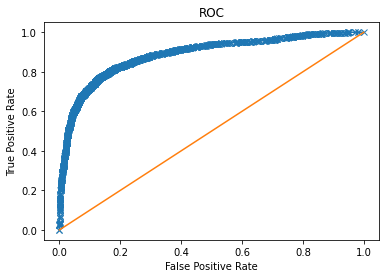

Area under Curve is 0.8870862654913187


In [306]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='ANN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1]))

## ANN Tune -  Test Data

In [307]:
confusion_matrix(y_test,ytest_predict)

array([[2757,   51],
       [ 313,  257]], dtype=int64)

In [308]:
mlp.score(X_test,y_test)

0.8318531675547661

In [309]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2808
           1       0.83      0.45      0.59       570

    accuracy                           0.89      3378
   macro avg       0.87      0.72      0.76      3378
weighted avg       0.89      0.89      0.88      3378



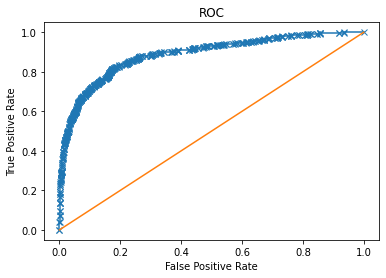

Area under Curve is 0.8874606387764282


In [310]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='ANN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1]))

In [311]:
# Variable Importance
#print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

AttributeError: 'MLPClassifier' object has no attribute 'feature_importances_'

<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#00b3e5;">3.3. SMOTE

### Naive Bayes with SMOTE

In [312]:
!pip install imbalanced-learn

In [313]:

import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")

In [314]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [315]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [316]:
X_train_res.shape

(13112, 17)

In [317]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [318]:
## Performance Matrix on train data set with SMOTE
y_train_predict_NB_SM = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(confusion_matrix(y_train_res, y_train_predict_NB_SM))
print(classification_report(y_train_res, y_train_predict_NB_SM))

0.7560250152532032
[[4574 1982]
 [1217 5339]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      6556
           1       0.73      0.81      0.77      6556

    accuracy                           0.76     13112
   macro avg       0.76      0.76      0.76     13112
weighted avg       0.76      0.76      0.76     13112



In [319]:
## Performance Matrix on test data set
y_test_predict_NB_SM = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict_NB_SM))
print(classification_report(y_test, y_test_predict_NB_SM))

0.7069271758436945
[[1952  856]
 [ 134  436]]
              precision    recall  f1-score   support

           0       0.94      0.70      0.80      2808
           1       0.34      0.76      0.47       570

    accuracy                           0.71      3378
   macro avg       0.64      0.73      0.63      3378
weighted avg       0.83      0.71      0.74      3378



### Logistic Regression with SMOTE

In [320]:
model_lr_smote=LogisticRegression(random_state=1)
model_lr_smote.fit(X_train_res, y_train_res)

LogisticRegression(random_state=1)

In [321]:
## Performance Matrix on train data set with SMOTE
y_train_predict_LR_SM = model_lr_smote.predict(X_train_res)
model_score1 = model_lr_smote.score(X_train_res, y_train_res)
print(model_score1)
print(confusion_matrix(y_train_res, y_train_predict_LR_SM))
print(classification_report(y_train_res, y_train_predict_LR_SM))

0.8054453935326419
[[5138 1418]
 [1133 5423]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      6556
           1       0.79      0.83      0.81      6556

    accuracy                           0.81     13112
   macro avg       0.81      0.81      0.81     13112
weighted avg       0.81      0.81      0.81     13112



In [322]:
## Performance Matrix on test data set
y_test_predict_LR_SM = model_lr_smote.predict(X_test)
model_score = model_lr_smote.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict_LR_SM))
print(classification_report(y_test, y_test_predict_LR_SM))

0.7797513321492007
[[2186  622]
 [ 122  448]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.85      2808
           1       0.42      0.79      0.55       570

    accuracy                           0.78      3378
   macro avg       0.68      0.78      0.70      3378
weighted avg       0.86      0.78      0.80      3378

